<div style="background-color: #c1f2a5">


# PS5
# Part 1

In Part 1 of this problem set, we will work with graphical models to reason from data to hypothesis.
## Instructions



Remember to do your problem set in Python 3. Fill in `#YOUR CODE HERE`.

Make sure: 
- that all plots are scaled in such a way that you can see what is going on (while still respecting specific plotting instructions) 
- that the general patterns are fairly represented.
- to label all x- and y-axes, and to include a title.
    
</div>

In [1]:
import numpy as np


  Bayesian networks provide an efficient way of representing a probability distribution. This made them very popular in artificial intelligence research, because they make it easy to handle uncertainty, as well as inferences both from cause to effect (making predictions) and effect to cause (forming explanations). These factors traditionally presented a challenge for AI approaches based on rules and symbols, such as production systems.
  
Read more about Bayesian networks here:
https://en.wikipedia.org/wiki/Bayesian_network

  The figure below shows a simple graphical model relating three variables. $X$ indicates whether the sprinklers were on last night, $Y$ indicates whether it rained last night, and $Z$ indicates whether the grass is wet. All three variables take on one of two values (1 for yes or 0 for no). We will proceed to refer to the random variables using their abstract names (X, Y, and Z). **You may want to jot down this graph on a piece of paper so you can refer to it later while solving the problems in Part 1.** 
    
       
</div>    
    
    
    

<center>    
  <img src="https://www.dropbox.com/s/y67y8owgvi63ogo/sprinklers.png?raw=1" width="300"/>
</center>



---


<div class="alert alert-danger">Note that in this problem, we will ask you to write down several equations. Your equations should be formatted using LaTeX. Refer back to Problem Set 0 if you forget how to format equations with LaTeX. 
<b>If your equations are not formatted with LaTeX, you will not receive full credit.</b>
</div>

Here are some examples on how to write equations in LaTeX. Gradescope will also accept LaTeX formatting.

To write a formula, use `$` signs: typing `$P(A|B)=.5$` will give you $P(A|B) = .5$. 


To write a fraction, type `$\frac{A}{B}$`, which will come out as $\frac{A}{B}$

To write a summation, write `$\sum_{i=0}^n p(X=x_i) = 1$`, which will come out as $\sum_{i=0}^n p(X=x_i) = 1$


You can combine all of this for more complex equations, for example, this equation
$$
P(X=x,Y=y|Z=z)=\frac{P(X=x, Y=y, Z=z)}{\sum_{m\in\{0, 1\}}\sum_{n\in \{0, 1\}} P(X=m, Y=n, Z=z)}
$$
can be coded like so:
`$$P(X=x,Y=y|Z=z)=\frac{P(X=x, Y=y, Z=z)}{\sum_{x'\in\{0, 1\}}\sum_{y'\in \{0, 1\}} P(X=x', Y=y', Z=z)}$$`.




## Q1 Bernoulli [2pts, HELP]

In this model, $X$, and $Y$ are <i>Bernoulli</i>-distributed random variables. A Bernoulli random variable takes a value of 1 (success) with probability $\theta$ and a value of 0 (failure) with probability $1-\theta$, where $\theta \in [0,1]$. For example, for a random variable or event $X$, we could write $P(X=1)=\theta_X$ and $P(X=0)=1-\theta_X$. Similarly, for $Y$, we can write $P(Y=1)=\theta_Y$ and $P(Y=0)=1-\theta_Y$.

(If you are familiar with the <i>Binomial</i> distribution, the <i>Bernoulli</i> is a special case, where $n$ = 1)

Read more about these distributions following the links below:

<i>Bernoulli</i> https://en.wikipedia.org/wiki/Bernoulli_distribution

<i>Binomial</i> https://en.wikipedia.org/wiki/Binomial_distribution

<div class="alert alert-success">

Complete the function `bernoulli` which returns the probability of a Bernoulli-distributed random variable (such as X or Y) taking a particular value given success probability $\theta$. Copy your function (Q1A) and the output of the cell after (Q1B) in gradescope.

</div>

### Q1.1 Copy your `bernoulli` function into Gradescope

In [2]:
def bernoulli(value, theta):
    """
    Returns the probability that this variable will take on the 
    specified value given success probability theta.
    
    Parameters
    ----------
    
    value: integer
        Value of the random variable (either 0 or 1)
    theta : float
        Probability of success (between 0 and 1)
 
    Returns
    -------
    a float corresponding to the the probability of realizing the value

    """  
    # YOUR CODE HERE
    if value == 1:
        return theta
    else:
        return 1 - theta

### Q1.2 Copy and paste the output of the following cell into Gradescope

Check that `bernoulli` produces expected output (do not submit this to gradescope):

In [3]:
from nose.tools import assert_equal

for theta in np.linspace(0, 1, 100):
    assert_equal(bernoulli(0, theta), 1 - theta)
    assert_equal(bernoulli(1, theta), theta)

print("Success!")

Success!


Copy and paste the output of the following cell in gradescope:

In [4]:
print("P(X=0 | theta=0.2) = " + str(bernoulli(0, .2)))
print("P(X=1 | theta=0.2) = " + str(bernoulli(1, .2)))
print("P(Y=0 | theta=0.4) = " + str(bernoulli(0, .4)))
print("P(Y=1 | theta=0.4) = " + str(bernoulli(1, .4)))

P(X=0 | theta=0.2) = 0.8
P(X=1 | theta=0.2) = 0.2
P(Y=0 | theta=0.4) = 0.6
P(Y=1 | theta=0.4) = 0.4


In [5]:
# (optional) add your own test cases here! Do not submit this to gradescope.


---
## Q2 Compute the joint probability [7 pts total]

In the current case, we will say that the probability that $X=1$ (that the sprinkler is on) is $0.6$, and the probability that $Y=1$ (that it rained) is $0.2$. In other words, $\theta_X = 0.6$ and $\theta_Y = 0.2$.

Below, we define two functions `p_x` and `p_y` by calling the `bernoulli` function you just wrote, using $0.6$ and $0.2$ as the theta values, respectively. In addition, we will say that the probability of $Z$ given $X$ and $Y$ (the probability of the state of the grass, given whether it rained and whether the sprinkler is on) is given by this table (Table 1):


<table class="table table-striped" style="width: 32em;">
    <thead>
    <tr>
        <th> x </th> 
        <th> y </th> 
        <th style="white-space: nowrap; width:20em"> P(Z=1 | X=x, Y=y) </th> 
    </tr>
    </thead>
    <tbody>
    <tr>
        <td>0</td>
        <td>0</td>
        <td>0.05</td>
    </tr>
    <tr>
        <td> 0 </td>
        <td> 1 </td>
        <td> 1.0 </td>
    </tr>
    <tr>
        <td> 1 </td>
        <td> 0 </td>
        <td> 1.0 </td>
    </tr>
    <tr>
        <td> 1 </td>
        <td> 1 </td>
        <td> 1.0 </td>
    </tr>
    </tbody>
</table>

The provided function `p_z_given_xy` returns probability that 
$Z=z$ for a given combination of $x$ and $y$, following the above table:

In [6]:
def p_x(x):
    """Computes P(X=x)"""
    return bernoulli(x, 0.6)

def p_y(y):
    """Computes P(Y=y)"""
    return bernoulli(y, 0.2)

def p_z_given_xy(z, x, y):
    """Computes P(Z=z | X=x, Y=y)"""
    if x == 0 and y == 0:
        return bernoulli(z, 0.05)
    else:
        return bernoulli(z, 1)

Given the above information about $P(X=x)$, $P(Y=y)$, and $P(Z=z\ |\ X=x,X=y)$, it is now possible to derive the joint probability distribution on $X$, $Y$, and $Z$ in order to populate the fourth column for the following table (Table 2). Let's walk through how to do this in the next few questions.
  
<table class="table table-striped" style="width: 20em;">
    <thead>
	<tr>
		<th> x </th>
		<th> y </th>
		<th> z </th>
		<th style="white-space: nowrap; width:10em"> P(X=x, Y=y, Z=z) </th>
	</tr>
    </thead>
    <tbody>
	<tr>
		<td> 0 </td>
		<td> 0 </td>
		<td> 0 </td>
		<td></td>
	</tr>
	<tr>
		<td> 0 </td>
		<td> 0 </td>
		<td> 1 </td>
		<td></td>
	</tr>
	<tr>
		<td> 0 </td>
		<td> 1 </td>
		<td> 0 </td>
		<td></td>
	</tr>
	<tr>
		<td> 0 </td>
		<td> 1 </td>
		<td> 1 </td>
		<td></td>
	</tr>
	<tr>
		<td> 1 </td>
		<td> 0 </td>
		<td> 0 </td>
		<td></td>
	</tr>
	<tr>
		<td> 1 </td>
		<td> 0 </td>
		<td> 1 </td>
		<td></td>
	</tr>
	<tr>
		<td> 1 </td>
		<td> 1 </td>
		<td> 0 </td>
		<td></td>
	</tr>
	<tr>
		<td> 1 </td>
		<td> 1 </td>
		<td> 1 </td>
	<td></td>
	</tr>
    </tbody>
</table> 

### Q2.1 Joint probability formula [2pts, HELP]
<div class="alert alert-success">

First, complete the equation below to compute the joint probability. Your answer should indicate how the probability can be calculated from $P(X=x)$, $P(Y=y)$, and $P(Z=z\ |\ X=x,Y=y)$. As a reminder, your answer MUST be formatted using LaTeX.

</div>

Type your answer in the Markdown cell below. Double-click on the Markdown cell to edit it. 

<!-- YOUR ANSWER HERE -->
$$ P(X=x, Y=y, Z=z) =  P(Z=z\ |\ X=x,Y=y) \cdot P(X=x) \cdot P(Y=y) $$

### Q2.2 Joint probability code [3pts, SOLO]
<div class="alert alert-success">

Now, complete the function `joint` according to the equation you defined above to returns the joint probability. Use the functions `p_x`, `p_y`, and `p_z_given_xy` in the function definition, but do *not* call the function `bernoulli` directly in `joint`. Values of $\theta$ are pre-defined in `p_x`, `p_y`, and `p_z_given_xy`. 
</div>

Remember: `p_x`, `p_y`, and `p_z_given_xy` are *functions* that you can call (with appropriate input arguments, of course).

Once you have implemented the `joint` function, proceed to compute the missing values in Table 2 by applying the `joint` function to each combination of $x$, $y$, and $z$ values in the next cell. Submit the output of this cell in gradescope **and** your code for the `joint` function.


In [7]:
def joint(x, y, z):
    """
    Returns the joint probability distribution P(X=x, Y=y, Z=z)
    for the values x, y, and z.
    
    Parameters
    ----------
    x, y, z: integer
        Value of random variable X, Y, and Z, respectively
 
    Returns
    -------
    a float corresponding to the joint probability
    
    """
    # YOUR CODE HERE
    return p_x(x) * p_y(y) * p_z_given_xy(z,x,y)

In [8]:
# (optional) add your own test cases here! Do not submit this to gradescope.


Check that `joint` produces expected output:

In [9]:
from numpy.testing import assert_allclose

# first assume that p_x, p_y, and p_z_given_xy have the specified values
assert_allclose(joint(0, 0, 0), 0.304)
assert_allclose(joint(1, 1, 1), 0.12)

# check that the p_x, p_y, and p_z_given_xy functions are called
old_p_x = p_x
old_p_y = p_y
old_p_z_given_xy = p_z_given_xy
del p_x
del p_y
del p_z_given_xy
try:
    joint(0, 0, 1)
except NameError:
    pass
else:
    raise AssertionError("joint does not call one or more of the p_x, p_y, and/or p_z_given_xy functions")
finally:
    p_x = old_p_x
    p_y = old_p_y
    p_z_given_xy = old_p_z_given_xy
    del old_p_x
    del old_p_y
    del old_p_z_given_xy
    
# switch out p_x, p_y, and p_z_given_xy with alternative theta values
old_p_x = p_x
old_p_y = p_y
old_p_z_given_xy = p_z_given_xy
def p_x(x):
    return bernoulli(x, 0.5)
def p_y(y):
    return bernoulli(y, 0.3)
def p_z_given_xy(z, x, y):
    if x == 0 and y == 0:
        return bernoulli(z, 0.8)
    else:
        return bernoulli(z, 0.7)

try:
    assert_allclose(joint(0, 0, 0), 0.07)
    assert_allclose(joint(0, 0, 1), 0.28)
    assert_allclose(joint(0, 1, 0), 0.045)
    assert_allclose(joint(0, 1, 1), 0.105)
    assert_allclose(joint(1, 0, 0), 0.105)
    assert_allclose(joint(1, 0, 1), 0.245)
    assert_allclose(joint(1, 1, 0), 0.045)
    assert_allclose(joint(1, 1, 1), 0.105)
finally:
    p_x = old_p_x
    p_y = old_p_y
    p_z_given_xy = old_p_z_given_xy
    del old_p_x, old_p_y, old_p_z_given_xy
    
print("Success!")

Success!


Copy the output of the following cell to submit in gradescope:

In [10]:
for x in [0, 1]:
    for y in [0, 1]:
        for z in [0, 1]:
            print("P(X={}, Y={}, Z={}) = {:.2g}".format(x, y, z, joint(x, y, z)))


P(X=0, Y=0, Z=0) = 0.3
P(X=0, Y=0, Z=1) = 0.016
P(X=0, Y=1, Z=0) = 0
P(X=0, Y=1, Z=1) = 0.08
P(X=1, Y=0, Z=0) = 0
P(X=1, Y=0, Z=1) = 0.48
P(X=1, Y=1, Z=0) = 0
P(X=1, Y=1, Z=1) = 0.12


### Q2.3 Joint probability discussion [2pts, SOLO]
If you implemented the `joint` function correctly, the cell above with test cases should print `Success!`. Furthermore, three events should have a probability of $0$. Describe in **one sentence** using plain text which three events they are. Then, explain why their joint probabilities are zero based on the meaning of the random variables (e.g. X is whether the sprinklers were on) and the structure of the graphical model in **at most one sentence per event**. 

The three events that have zero probabilities are sprinklers off/rained/dry grass, sprinklers on/didn't rain/dry grass, and sprinklers on/rained/dry grass. The reason why their joint probabilities are zero is because observing either of the sprinklers being on or rain occurring influence whether we observe wet grass, as indicated in the graphical model. Thus, observing any combination of either sprinklers being on, rain, or both, and non-wet grass has zero probability.

---
## Q3  Conditional probability [5 pts total]

Imagine that you observe the grass is wet in the morning ($Z=1$). What happens to your beliefs about the sprinklers being on and whether it rained last night? To answer this question, we need to compute the conditional probability distribution over $X$ and $Y$ when $Z=z$. We can calculate this conditional probability distribution $P(X=x,Y=y\ |\ Z=z)$ using the joint probability distribution $P(X=x, Y=y, Z=z)$ as follows:

$$
P(X=x,Y=y\ |\ Z=z)=\frac{P(X=x, Y=y, Z=z)}{\sum_{m\in\{0, 1\}}\sum_{n\in \{0, 1\}} P(X=m, Y=n, Z=z)}
$$

Note that the denominator of this equation is equivalent to $P(Z=z)$.


## Q3.1 Conditional probability function [2 pts, HELP]
<div class="alert alert-success">

Complete the function `p_xy_given_z` to return $P(X=x,Y=y~|~Z=z)$ for given input values of $x$, $y$, $z$. Your answer should use the `joint` function you implemented above.
</div>
Copy your answer into gradescope.

In [11]:
def p_xy_given_z(x, y, z):
    """
    Returns the conditional probability distribution P(X=x, Y=y | Z=z)
    for the values x, y, and z.
    
    Parameters
    ----------
    x, y, z: integers
        values of random variables X, Y, and Z, respectively
 
    Returns
    -------
    a float corresponding to the conditional probability
    
    """
    # YOUR CODE HERE
    denom = 0
    for m in np.arange(2):
        for n in np.arange(2):
            denom += joint(m,n,z)
            
    return joint(x,y,z)/denom

In [12]:
# (optional) add your own test cases here! Do not submit this to gradescope.


Check that `p_xy_given_z` produces expected output (do not submit this to gradescope):

In [13]:
assert_allclose(p_xy_given_z(0, 0, 0), 1.0, atol=1e-05)
assert_allclose(p_xy_given_z(0, 1, 1), 0.11494, atol=1e-05)
assert_allclose(p_xy_given_z(1, 0, 1), 0.68965, atol=1e-05)
    
# check that it calls joint
old_joint = joint
del joint
try:
    p_xy_given_z(0, 0, 1)
except NameError:
    pass
else:
    raise AssertionError("p_xy_given_z does not call the joint function")
finally:
    joint = old_joint
    del old_joint
    
# switch out p_x, p_y, and p_z_given_xy with alternative theta values
old_p_x = p_x
old_p_y = p_y
old_p_z_given_xy = p_z_given_xy
def p_x(x):
    return bernoulli(x, 0.5)
def p_y(y):
    return bernoulli(y, 0.3)
def p_z_given_xy(z, x, y):
    if x == 0 and y == 0:
        return bernoulli(z, 0.8)
    else:
        return bernoulli(z, 0.7)

try:
    assert_allclose(p_xy_given_z(0, 0, 0), 0.2641509433962263, atol=1e-05)
    assert_allclose(p_xy_given_z(0, 1, 0), 0.169811320754717, atol=1e-05)
    assert_allclose(p_xy_given_z(1, 0, 0), 0.39622641509433965, atol=1e-05)
    assert_allclose(p_xy_given_z(1, 1, 0), 0.169811320754717, atol=1e-05)
    assert_allclose(p_xy_given_z(0, 0, 1), 0.380952380952381, atol=1e-05)
    assert_allclose(p_xy_given_z(0, 1, 1), 0.14285714285714288, atol=1e-05)
    assert_allclose(p_xy_given_z(1, 0, 1), 0.33333333333333337, atol=1e-05)
    assert_allclose(p_xy_given_z(1, 1, 1), 0.14285714285714288, atol=1e-05)
finally:
    p_x = old_p_x
    p_y = old_p_y
    p_z_given_xy = old_p_z_given_xy
    del old_p_x, old_p_y, old_p_z_given_xy

print("Success!")

Success!


## Q3.2 Conditional probability discussion [3 pts, SOLO]
A) Once you have completed `p_xy_given_z`, we can compute the probabilities for each value combination of $x$, $y$, and $z$.
Run the next cell, and copy the output into gradescope.

B) If your output is correct, you should see that $P(X = 0, Y=0|Z=0) = 1$. Explain in **at most one sentence** what this means in terms of sprinklers, rain and wet grass, and the structure of the graphical model. Submit your answer to gradescope. 

C) If your output is correct, $P(X = 0, Y=1|Z=1)$ should be smaller than $P(X = 1, Y=0|Z=1)$. In **at most two sentences**, explain in words what this means under the setup of our problem and why this makes sense based on our generative graphical model. 

Note that you can answer B and C even without a working implementation of the functions.

In [14]:
# Copy the output of this cell in gradescope for Q3.2A
for z in [0, 1]:
    for x in [0, 1]:
        for y in [0, 1]:
            print("P(X={}, Y={} | Z={}) = {:.2g}".format(
                x, y, z, p_xy_given_z(x, y, z)))


P(X=0, Y=0 | Z=0) = 1
P(X=0, Y=1 | Z=0) = 0
P(X=1, Y=0 | Z=0) = 0
P(X=1, Y=1 | Z=0) = 0
P(X=0, Y=0 | Z=1) = 0.023
P(X=0, Y=1 | Z=1) = 0.11
P(X=1, Y=0 | Z=1) = 0.69
P(X=1, Y=1 | Z=1) = 0.17


B) This output means that it's 100% likely that the sprinklers were off and that it didn't rain last night given that we observed that the grass is not wet.

C) This output means that it was more likely that the sprinklers were on given we observed wet grass than rain occurring. This makes sense, because our generative model has a higher probability of the sprinklers being on (0.6) than it having rained (0.2).

---
## Q4 Marginalization [8 pts total]


### Q4.1 Equation [2pts, HELP]
Now assume that we are only interested in whether the sprinklers were on, given the observation that the grass is wet ($z=1$) or not ($z=0$).

<div class="alert alert-success">

Define the equation to compute $P(X=x\ |\ Z=z)$ in LaTex format like in Q2.1. Your answer should indicate how it can be calculated using $P(X=x, Y=y, Z=z)$. As a reminder, your answer MUST be formatted using LaTeX.
</div>

Type your answer in the Markdown cell below.

<!-- YOUR ANSWER HERE -->

$$P(X=x\ |\ Z=z) = \frac{\sum_{n\in \{0,1\}}P(X=x, Y=n, Z=z)}{\sum_{m\in\{0, 1\}}\sum_{n\in \{0, 1\}} P(X=m, Y=n, Z=z)}$$


### Q4.2 p_x_given_z [3pts, SOLO]
<div class="alert alert-success">

Implement the function `p_x_given_z` to return $P(X=x\ |\ Z=z)$ for given values of $x$ and $z$. Your function should call the `joint` function you implemented earlier.</div>
Check that your implementation returns the correct output using the provided test cases and your own. 

**Q4.2 A** Copy your code into gradescope.

**Q4.2 B** Also report the output of the cell below, where indicated.

In [15]:
def p_x_given_z(x, z):
    """
    Returns the marginal probability distribution P(X=x | Z=z) given 
    the values x and z.
    
    Parameters
    ----------
    x, z : integers
        values of the random variables X and Z, respectively
 
    Returns
    -------
    a float corresponding to the marginal probability
    
    """
    # YOUR CODE HERE
    denom = 0
    for m in np.arange(2):
        for n in np.arange(2):
            denom += joint(m,n,z)
            
    numer = 0
    for n in np.arange(2):
        numer += joint(x,n,z)
        
    return numer/denom

In [16]:
# (optional) add your own test cases here! Do not submit this to gradescope.


Check that `p_x_given_z` produces expected output:

In [17]:
# check that it calls joint
old_joint = joint
del joint
try:
    p_x_given_z(0, 1)
except NameError:
    pass
else:
    raise AssertionError("p_x_given_z does not call the joint function")
finally:
    joint = old_joint
    del old_joint
    
# switch out p_x, p_y, and p_z_given_xy with alternative theta values
old_p_x = p_x
old_p_y = p_y
old_p_z_given_xy = p_z_given_xy
def p_x(x):
    return bernoulli(x, 0.5)
def p_y(y):
    return bernoulli(y, 0.3)
def p_z_given_xy(z, x, y):
    if x == 0 and y == 0:
        return bernoulli(z, 0.8)
    else:
        return bernoulli(z, 0.7)

try:
    assert_allclose(p_x_given_z(1, 1), 0.4761904761904762, atol=1e-05)
    assert_allclose(p_x_given_z(0, 1), 0.5238095238095238, atol=1e-05)
    assert_allclose(p_x_given_z(1, 0), 0.5660377358490567, atol=1e-05)
    assert_allclose(p_x_given_z(0, 0), 0.43396226415094336, atol=1e-05)
finally:
    p_x = old_p_x
    p_y = old_p_y
    p_z_given_xy = old_p_z_given_xy
    del old_p_x, old_p_y, old_p_z_given_xy

print("Success!")

Success!



**Q4.2 B** 

Once you have implemented `p_x_given_z`, we can print out the probability table for all values of $X$ and $Z$.
Copy the output of the cell below into gradescope.


In [18]:
# Copy the output of this cell in gradescope for Q4.2B

for z in [0, 1]:
    for x in [0, 1]:
        print("P(X={} | Z={}) = {}".format(x, z, p_x_given_z(x, z)))

P(X=0 | Z=0) = 1.0
P(X=1 | Z=0) = 0.0
P(X=0 | Z=1) = 0.13793103448275865
P(X=1 | Z=1) = 0.8620689655172414


### Q4.3. Calculate p_x_given_z [3pts, SOLO]
<div class="alert alert-success">

Run the cell below to compute $P(~X=1~)$ and $P(~X=1~|~Z=1~)$, and copy the output into gradescope. What does observing that the grass is wet do to the belief about whether the sprinklers were on and why? Explain in **at most two sentences**.
</div>

In [19]:
# Copy and paste the output of this cell in gradescope
print("P(X=1)       = {}".format(p_x(1)))
print("P(X=1 | Z=1) = {}".format(p_x_given_z(1, 1)))

P(X=1)       = 0.6
P(X=1 | Z=1) = 0.8620689655172414


Observing that the grass is wet makes it more likely for us to believe that the sprinklers were on. This is because if we didn't have any knowledge that the grass was wet, then we would only have the probability of the sprinklers being on; but if we do have prior knowledge that the grass was wet, then it makes it more likely that the sprinklers were on so as to have caused the grass to be wet.

---
## Q5 [7 pts total]

Imagine you got into your car, and heard on the radio that it rained last night ($Y=1$). Let's see how that affects your belief about whether the sprinklers were on.


### Q5.1 Equation [2pts, HELP]
<div class="alert alert-success">

Write down the equation for $P(X=x\ |\ Y=y, Z=z)$ in LaTex format like in Q2.1. Your answer should indicate how it can be calculated using $P(X=x, Y=y, Z=z)$. As a reminder, your answer MUST be formatted using LaTeX.</div>

Type your answer in the Markdown cell below.

<!-- YOUR ANSWER HERE -->

$$P(X=x\ |\ Y=y,Z=z) = \frac{P(X=x, Y=y, Z=z)}{\sum_{m\in (0,1)}P(X=m, Y=y, Z=z)} $$

### Q5.2 Code [3pts, SOLO]
<div class="alert alert-success">

Using your equation, complete the function `p_x_given_yz` to return $P(~X=x~|~Y=y,Z=z~)$ for given values of $x$, $y$ and $z$. As before, your function should call the `joint` function you defined earlier or a function that calls it.</div>

**Q5.2 A** Copy and paste your code for `p_x_given_yz` in Gradescope.    
   
   
**Q5.2 B** Copy the output of the cell that prints out the full table values into Gradescope.

In [20]:
def p_x_given_yz(x, y, z):
    """
    Returns the conditional probability distribution P(X=x | Y=y, Z=z)
    given the values x, y, and z.
    
    Parameters
    ----------
    x, y, z : integers
        values of the random variables X, Y, and Z
 
    Returns
    -------
    a float corresponding to the conditional probability
    
    """
    # Return 0 if the joint probability is 0
    if joint(x,y,z)==0:
        return 0

    # YOUR CODE HERE
    return joint(x,y,z)/(joint(1,y,z)+joint(0,y,z))

In [21]:
# (optional) add your own test cases here! Do not submit this to gradescope.


Check that `p_x_given_yz` produces expected output:

In [22]:
# check that it calls joint
old_joint = joint
del joint
try:
    p_x_given_yz(0, 1, 1)
except NameError:
    pass
else:
    raise AssertionError("p_x_given_yz does not call the joint function")
finally:
    joint = old_joint
    del old_joint
    
# switch out p_x, p_y, and p_z_given_xy with alternative theta values
old_p_x = p_x
old_p_y = p_y
old_p_z_given_xy = p_z_given_xy
def p_x(x):
    return bernoulli(x, 0.5)
def p_y(y):
    return bernoulli(y, 0.3)
def p_z_given_xy(z, x, y):
    if x == 0 and y == 0:
        return bernoulli(z, 0.8)
    else:
        return bernoulli(z, 0.7)

try:
    assert_allclose(p_x_given_yz(0, 0, 0), 0.4, atol=1e-05)
    assert_allclose(p_x_given_yz(1, 0, 0), 0.6, atol=1e-05)
    assert_allclose(p_x_given_yz(0, 1, 0), 0.5, atol=1e-05)
    assert_allclose(p_x_given_yz(1, 1, 0), 0.5, atol=1e-05)
    assert_allclose(p_x_given_yz(0, 0, 1), 0.5333333333333333, atol=1e-05)
    assert_allclose(p_x_given_yz(1, 0, 1), 0.4666666666666667, atol=1e-05)
    assert_allclose(p_x_given_yz(0, 1, 1), 0.5, atol=1e-05)
    assert_allclose(p_x_given_yz(1, 1, 1), 0.5, atol=1e-05)
finally:
    p_x = old_p_x
    p_y = old_p_y
    p_z_given_xy = old_p_z_given_xy
    del old_p_x, old_p_y, old_p_z_given_xy

print("Success!")

Success!


After you have implemented `p_x_given_yz`, you can print out the full probability table. Submit the output of the cell below in gradescope. 

In [23]:
# Copy the output of this cell into gradescope
for z in [0, 1]:
    for y in [0, 1]:
        for x in [0, 1]:
            print("P(X={} | Y={}, Z={}) = {}".format(x, y, z, p_x_given_yz(x, y, z)))

P(X=0 | Y=0, Z=0) = 1.0
P(X=1 | Y=0, Z=0) = 0
P(X=0 | Y=1, Z=0) = 0
P(X=1 | Y=1, Z=0) = 0
P(X=0 | Y=0, Z=1) = 0.03225806451612904
P(X=1 | Y=0, Z=1) = 0.9677419354838709
P(X=0 | Y=1, Z=1) = 0.4000000000000001
P(X=1 | Y=1, Z=1) = 0.6


### Q5.3 Interpretation  [2pts, SOLO]


<div class="alert alert-success">

Run the cell below to compute $P(~X=1~|~Z=1~)$, $P(~X=1~|~Y=1,Z=1~)$, and $P(~X=1~)$. What is the effect of hearing that it rained ($Y=1$) on your belief that the sprinklers were on ($X=1$), given that you know the grass is wet ($Z=1$)? How does it compare to your belief about whether the sprinklers were on without knowing if the grass is wet? Why does observing that it rained cause this to happen? Answer in **at most three sentences** in total. </div> 

Hint: if your code is correct, you should get $P(~X=1~|~Z=1~) = 0.862$ and $P(~X=1~|~Y=1,Z=1~) = 0.6$. If your code does not produce the right results, you can still answer the question *based on these correct values*.

In [24]:
# Copy the output of this cell in Gradescope for Q5.3A
print("P(X=1 | Z=1)      = {}".format(p_x_given_z(1, 1)))
print("P(X=1 | Y=1, Z=1) = {}".format(p_x_given_yz(1, 1, 1)))
print("P(X=1)            = {}".format(p_x(1)))

P(X=1 | Z=1)      = 0.8620689655172414
P(X=1 | Y=1, Z=1) = 0.6
P(X=1)            = 0.6


Observing that it rained (𝑌=1) makes our belief that the sprinklers were on (𝑋=1) less likely, given that the grass is wet. This probability is equal to whether the sprinklers were on without knowing if the grass is wet. Observing that it rained causes this to happen because rain being on activates/causes us to observe that the grass to be wet, so the probability of the sprinklers being on given both it raining and the grass being wet reduces to the probability of the sprinklers being on.

---
## Q6 Final discussion [5 pts, SOLO]

<div class="alert alert-success">

The two pieces of evidence we observed (i.e., wet grass and hearing that it rained) both affected the Bayesian network's belief about whether the sprinklers were on. Compare the pattern of inference produced by the Bayesian network with that of a production system like the one in PS3. You don't need to focus on a specific production system or work out its predictions -- just summarize the aspects of this inference that might be hard to capture using a production system. Answer in **no more than two sentences**. </div>

The patterns of inferences produced by the Bayesian network, and in particular the probabilities associated with events occurring, given and not given evidence, would be hard to capture using a production system. This is because, unlike Bayesian networks, production systems are like an on/off switch of whether an event is observed or not.

---
<div style="background-color: #c1f2a5">


# Part 2

In this part of the problem set, we are going to implement k-means clustering.
    
## Instructions



Remember to do your problem set in Python 3. Fill in `#YOUR CODE HERE`.

Unless we specify otherwise, make sure: 
- that all plots are scaled in such a way that you can see what is going on (while still respecting specific plotting instructions) 
- that the general patterns are fairly represented.
- to label all x- and y-axes, and to include a title.
    
**Test cases are here to help you debug your code, but passing them successfully is not a guarantee that your code is correct.**
    
</div>

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

An example observation from the categories cat, dog, and mop are presented below:


![](images/test.png)


We assume each observation can be represented as a pair of ($x,y$) coordinates, i.e., the objects are represented in a two-dimensional space. Suppose we have some observations from each category of objects, but have lost the information as to which observation belongs to which category.

To recover this information, we will use an unsupervised learning algorithm called _k-means clustering_. As you may recall from lecture, the $k$ here refers to the number of clusters or categories we believe exist in the data, and the goal of the algorithm is to assign labels to the data points using their distances to the centers (or means) of the clusters. In other words, each data point should be assigned the category label of the cluster whose center is closest to this data point. For this particular problem, we assume $k=3$. After randomly initializing cluster centers,
the algorithm can be broken down into two alternating steps: 

1. Update the cluster assignments (labels) of the data points based on the nearest cluster centers.
2. Update the positions of the cluster centers to reflect the updated assignments of data points.

Before you begin, load the data that we will use by running the code cell below. Until Q10, use the `centers` loaded from the `X.npz` file below (i.e., do NOT randomly initialize the values yourself - the autograder relies on a specific initialization). In practice, cluster centers are normally randomly initialized, which we will implement in Q11.

In [26]:
data = np.load('data/X.npz')
X = data['X']
centers = data['centers'] 

print ('[x,y] coordinates of observations: \n' + str(X))
print ('\n[x,y] coordinates of cluster centers: \n' + str(centers))

[x,y] coordinates of observations: 
[[3.17014624 2.42738134]
 [3.10945591 1.90239505]
 [2.96418311 1.82748366]
 [2.91461687 1.88794482]
 [3.51445266 2.17859409]
 [2.90636624 1.67106719]
 [2.9524492  2.15678052]
 [2.7653169  1.66717629]
 [2.79663441 1.96728796]
 [2.85409531 1.54327596]
 [3.63398062 2.9905047 ]
 [3.67321618 2.9501688 ]
 [3.32811256 3.22041747]
 [3.57939394 2.98596398]
 [3.54071059 2.78969028]
 [3.78977898 2.96128904]
 [3.53209701 3.29714867]
 [3.75986453 2.89627318]
 [3.47080721 2.83534581]
 [3.33792577 3.24599767]
 [3.02530687 3.60834344]
 [2.90932354 4.26426491]
 [2.81529304 3.85310555]
 [2.6300394  4.0755554 ]
 [3.03834294 4.0548656 ]
 [2.92074563 3.78044972]
 [3.07972956 3.28465006]
 [2.63586335 4.13388882]
 [3.33045863 3.91449067]
 [3.12180098 3.85053529]]

[x,y] coordinates of cluster centers: 
[[4.02596083 2.52095016]
 [3.07295517 3.6180417 ]
 [2.10083931 2.40466689]]


---

## Q7.1 Distance [2pts, SOLO]

First, we will need a function that returns the distance between two points. We can use _Euclidean distance_ to compute the distance between two points ($x_1,y_1$) and ($x_2,y_2$). Recall **from the MDS examples** that Euclidean distance in $\mathbb{R}^2$ is calculated as:

$$
distance((x_1,y_1),(x_2,y_2)) = \sqrt{(x_1 - x_2)^{2} + (y_1 - y_2)^{2}}
$$

<div class="alert alert-success">

Implement the `distance` function below to calculate the Euclidean distance between two points in $\mathbb{R}^2$. Copy and paste your code in gradescope.
</div>

In [27]:
def distance(a, b):
    """
    Returns the Euclidean distance between two points, 
    a and b, in R^2.
    
    Parameters
    ----------
    a, b : numpy arrays of shape (2,)
        The (x,y) coordinates for two points, a and b, 
        in R^2. E.g., a[0] is the x coordinate, 
        and a[1] is the y coordinate.
            
    Returns
    -------
    distance : float
        The Euclidean distance between a and b
    """
    # YOUR CODE HERE
    return ((a[0]-b[0])**2 + (a[1]-b[1])**2) ** (1/2)

In [28]:
# (optional) add your own test cases here! Do not submit this to gradescope.


Check `distance` computes the correct values (do not submit this to gradescope): 

In [29]:
from numpy.testing import assert_allclose

assert_allclose(distance(np.array([0.0, 0.0]), np.array([0.0, 1.0])), 1.0)
assert_allclose(distance(np.array([3.0, 3.0]), np.array([4.3, 5.0])), 2.3853720883753127)
assert_allclose(distance(np.array([130.0, -25.0]), np.array([0.4, 15.0])), 135.63244449614552)

print("Success!")

Success!


## Q7.2 Assignments [3pts, HELP]
<div class="alert alert-success">

Now, we will write a function to update the cluster that each point is assigned to in a single iteration. To do so, we will compute the distance from a point to the center of each cluster, and figure out which cluster center is the closest to the data point. Implement the `update_assignments` function to do this using your `distances` function. Copy-paste your code in gradescope.
</div>

In [30]:
def update_assignments(num_clusters, X, centers):
    """
    Returns the cluster assignment (number) for each data point 
    in X, computed as the closest cluster center. Therefore, the 
    output is going to be an array with the length corresponding 
    to the number of datapoints.
    
    Parameters
    ----------
    num_clusters : int
        The number of disjoint clusters (i.e., k) in 
        the X
    
    X : numpy array of shape (m, 2)
        An array of m data points in R^2.
    
    centers : numpy array of shape (num_clusters, 2)
        The coordinates for the centers of each cluster
        
    Returns
    -------
    cluster_assignments : numpy array of shape (m,)
        An array containing the cluster label assignments 
        for each data point in X. Each cluster label is an integer
        between 0 and (num_clusters - 1). 
    """
    # YOUR CODE HERE
    assignments = np.array([])
    for point in X:
        curr = 999999999
        best = 0
        for i in np.arange(num_clusters):
            if curr > distance(point, centers[i]):
                curr = distance(point, centers[i])
                best = i
        assignments = np.append(assignments, best)
    return assignments

In [31]:
# (optional) add your own test cases here! Do not submit this to gradescope.


Check `update_assignments` computes the correct values (do not submit this to gradescope). The following cell provides a test case. If it does not return "Success!", your code is incorrect.

In [32]:
from nose.tools import assert_equal
from numpy.testing import assert_array_equal

# load the data
data = np.load('data/X.npz')
X = data['X']

# validate update_assignments using different values
actual = update_assignments(2, X, np.array([[3, 2], [1, 4]]))
expected = np.array([
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0])

# is the output of the correct shape?
assert_equal(actual.shape[0], X.shape[0])

# are the cluster labels correct?
assert_array_equal(expected, actual)

# validate update_assignments using different values
actual = update_assignments(3, X[:int(X.shape[0]/2)], np.array([X[0], X[1], X[2]]))
expected = np.array([0, 1, 2, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0])

# is the output of the correct shape?
assert_equal(actual.shape[0], X.shape[0] / 2)

# are the cluster labels correct?
assert_array_equal(expected, actual)

# check that it uses distance
old_distance = distance
del distance
try:
    update_assignments(2, X, np.array([[3, 2], [1, 4]]))
except NameError:
    pass
else:
    raise AssertionError("update_assignments does not call distance")
finally:
    distance = old_distance
    del old_distance

print("Success!")

Success!


---
## Q8. Update [3pts, HELP] 

<div class="alert alert-success">

Now, we need to perform the next step of the clustering algorithm: recompute the cluster centers based on which points are assigned to that cluster. Recall that the new center of a cluster is simply the two-dimensional mean of the data points in this cluster. A two-dimensional mean is represented by the mean of the x coordinates and the mean of the y coordinates. Complete the `update_parameters` function to do this (read the doc string carefully to make sure you return the right output). Copy and paste your code in gradescope. </div>

In [76]:
def update_parameters(num_clusters, X, cluster_assignment, old_centers=None):
    """
    Recalculates cluster centers running update_assignments.
    
    Parameters
    ----------
    num_clusters : int
        The number of disjoint clusters (i.e., k) in 
        the X
    
    X : numpy array of shape (m, 2)
        An array of m data points in R^2
    
    cluster_assignment : numpy array of shape (m,)
        The array of cluster labels assigned to each data 
        point as returned from update_assignments
    
    Returns
    -------
    updated_centers : numpy array of shape (num_clusters, 2)
        An array containing the new positions for each of 
        the cluster centers
    """
    # YOUR CODE HERE
    points = list(zip(X, cluster_assignment))
    centers = np.array([])
    for i in np.arange(num_clusters):
        matches = [x for x in points if x[1]==i]
        coords = [x[0] for x in matches]
        if not coords:
            centers = np.append(centers, old_centers[i])
        else:
            centers = np.append(centers, np.mean(coords, axis=0))
    return centers.reshape(num_clusters, 2)

In [77]:
# (optional) add your own test cases here! Do not submit this to gradescope.
x = [(2,2), (2,3), (2,4)]
cluster = [0, 1, 1]

new = list(zip(x, cluster))

newlist = [x for x in new if x[1] == 1]
final = [x[0] for x in newlist]
mean = np.mean(final, axis=0)
mean.reshape(1,2)

array([[2. , 3.5]])

Check `update_parameters` computes the correct values (do not submit this to gradescope): 

In [78]:
from nose.tools import assert_equal
from numpy.testing import assert_allclose

# load the data
data = np.load('data/X.npz')
X = data['X']

# validate update_assignments using different values
cluster_assignment1 = np.array([
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0])
actual = update_parameters(2, X, cluster_assignment1)
expected = np.array([[ 3.24286584,  2.71362623], [ 2.80577245,  4.07633606]])
assert_allclose(expected, actual)

cluster_assignment2 = np.array([0, 1, 2, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0])
actual = update_parameters(3, X[:int(X.shape[0]/2)], cluster_assignment2)
expected = np.array([[ 3.4914304 ,  2.79181724], [ 3.03095255,  2.02958778], [ 2.86686881,  1.76070598]])
assert_allclose(expected, actual, rtol=1e-6)
    
print("Success!")

Success!


## Q9. Running k-means [3pts, SOLO]

At this stage you are ready to run the $k$-means clustering algorithm! The `k_means` function below will call your functions from Q7.2 and Q8 to run the k-means algorithm on the data points in `X`. Note that for this problem we assume that $k = 3$.

Take a look at the function `k_means` we've provided below and run the next cell to call it.

In [80]:
def k_means(num_clusters, X, centers, update_assignments, 
            update_parameters, n_iter=4, plotting = True):
    """
    Runs the k-means algorithm for n_iter iterations and plots
    the results.
    
    Parameters
    ----------
    num_clusters : int
        The number of disjoint clusters (i.e., k) to search for
        in X
    
    X : numpy array of shape (m, 2)
        An array of m data points in R^2
        
    centers : numpy array of shape (num_clusters, 2)
        The coordinates for the centers of each cluster
        
    update_assignments : function
        The function you completed in part A
    
    update_parameters : function
        The function you completed in part B
    
    n_iter : int (optional)
        The number of iterations to run the k_means update procedure.
        If not specified, defaults to 4.
    
    plotting : boolean (optional)
        plot the steps if true
        
    Returns
    -------
    cluster_assignments : numpy array of shape (m,) 
        The final label assignments for each of the data points in X
        
    centers : numpy array of shape (num_clusters, 2)
        The final cluster centroids in R^2 after running k-means
        
    fig: the figure object
    """
    if plotting:
        fig, ax = plt.subplots(2, n_iter,figsize=(30,15))
        fig.tight_layout(h_pad=2.0)
        ax = ax.flatten()

    for i in range(n_iter):
        # Step 1: Update cluster assignments
        cluster_assignments = \
            update_assignments(num_clusters, X, centers)
           
        if plotting:
            # plot data with colors corresponding to cluster assignments
            for j in range(X.shape[0]):
                if cluster_assignments[j] == 0:
                    ax[2*i].plot(X[j,0], X[j,1], 'r.')
                elif cluster_assignments[j] == 1:
                    ax[2*i].plot(X[j,0], X[j,1], 'b.')
                else:
                    ax[2*i].plot(X[j,0], X[j,1], 'g.')

            # plot the centers as stars with the associated color
            ax[2*i].plot(centers[0,0], centers[0,1], 'r*', markersize=10)
            ax[2*i].plot(centers[1,0], centers[1,1], 'b*', markersize=10)
            if len(centers)>2:
                ax[2*i].plot(centers[2,0], centers[2,1], 'g*', markersize=10)
            ax[2*i].set_title('Step 1: \nIteration ' + str(i+1))

            ax[2*i].set_xlim([2, 4.5])
            ax[2*i].set_ylim([1, 4.5])
            ax[2*i].set_xticks([]) 
            ax[2*i].set_yticks([])
        
        # Step 2: Update the cluster centers
        centers = \
            update_parameters(num_clusters, X, cluster_assignments, centers)
        
        if plotting:
            # Plot data assignments with the updated center positions
            for j in range(X.shape[0]):
                if cluster_assignments[j] == 0:
                    ax[2*i+1].plot(X[j,0], X[j,1], 'r.')
                elif cluster_assignments[j] == 1:
                    ax[2*i+1].plot(X[j,0], X[j,1], 'b.')
                else:
                    ax[2*i+1].plot(X[j,0], X[j,1], 'g.')

            # Plot cluster centers as stars
            ax[2*i+1].plot(centers[0][0], 
                           centers[0][1], 
                           'r*', markersize=10)
            ax[2*i+1].plot(centers[1][0], 
                           centers[1][1], 
                           'b*', markersize=10)
            
            if len(centers)>2:
                ax[2*i+1].plot(centers[2][0], 
                               centers[2][1], 
                               'g*', markersize=10)
                
            ax[2*i+1].set_title('Step 2: \nIteration ' + str(i+1))

            ax[2*i+1].set_xlim([2, 4.5])
            ax[2*i+1].set_ylim([1, 4.5])
            ax[2*i+1].set_xticks([])
            ax[2*i+1].set_yticks([])
        
    if plotting:
        plt.show()
        return cluster_assignments, centers, fig
    else: 
        return cluster_assignments, centers

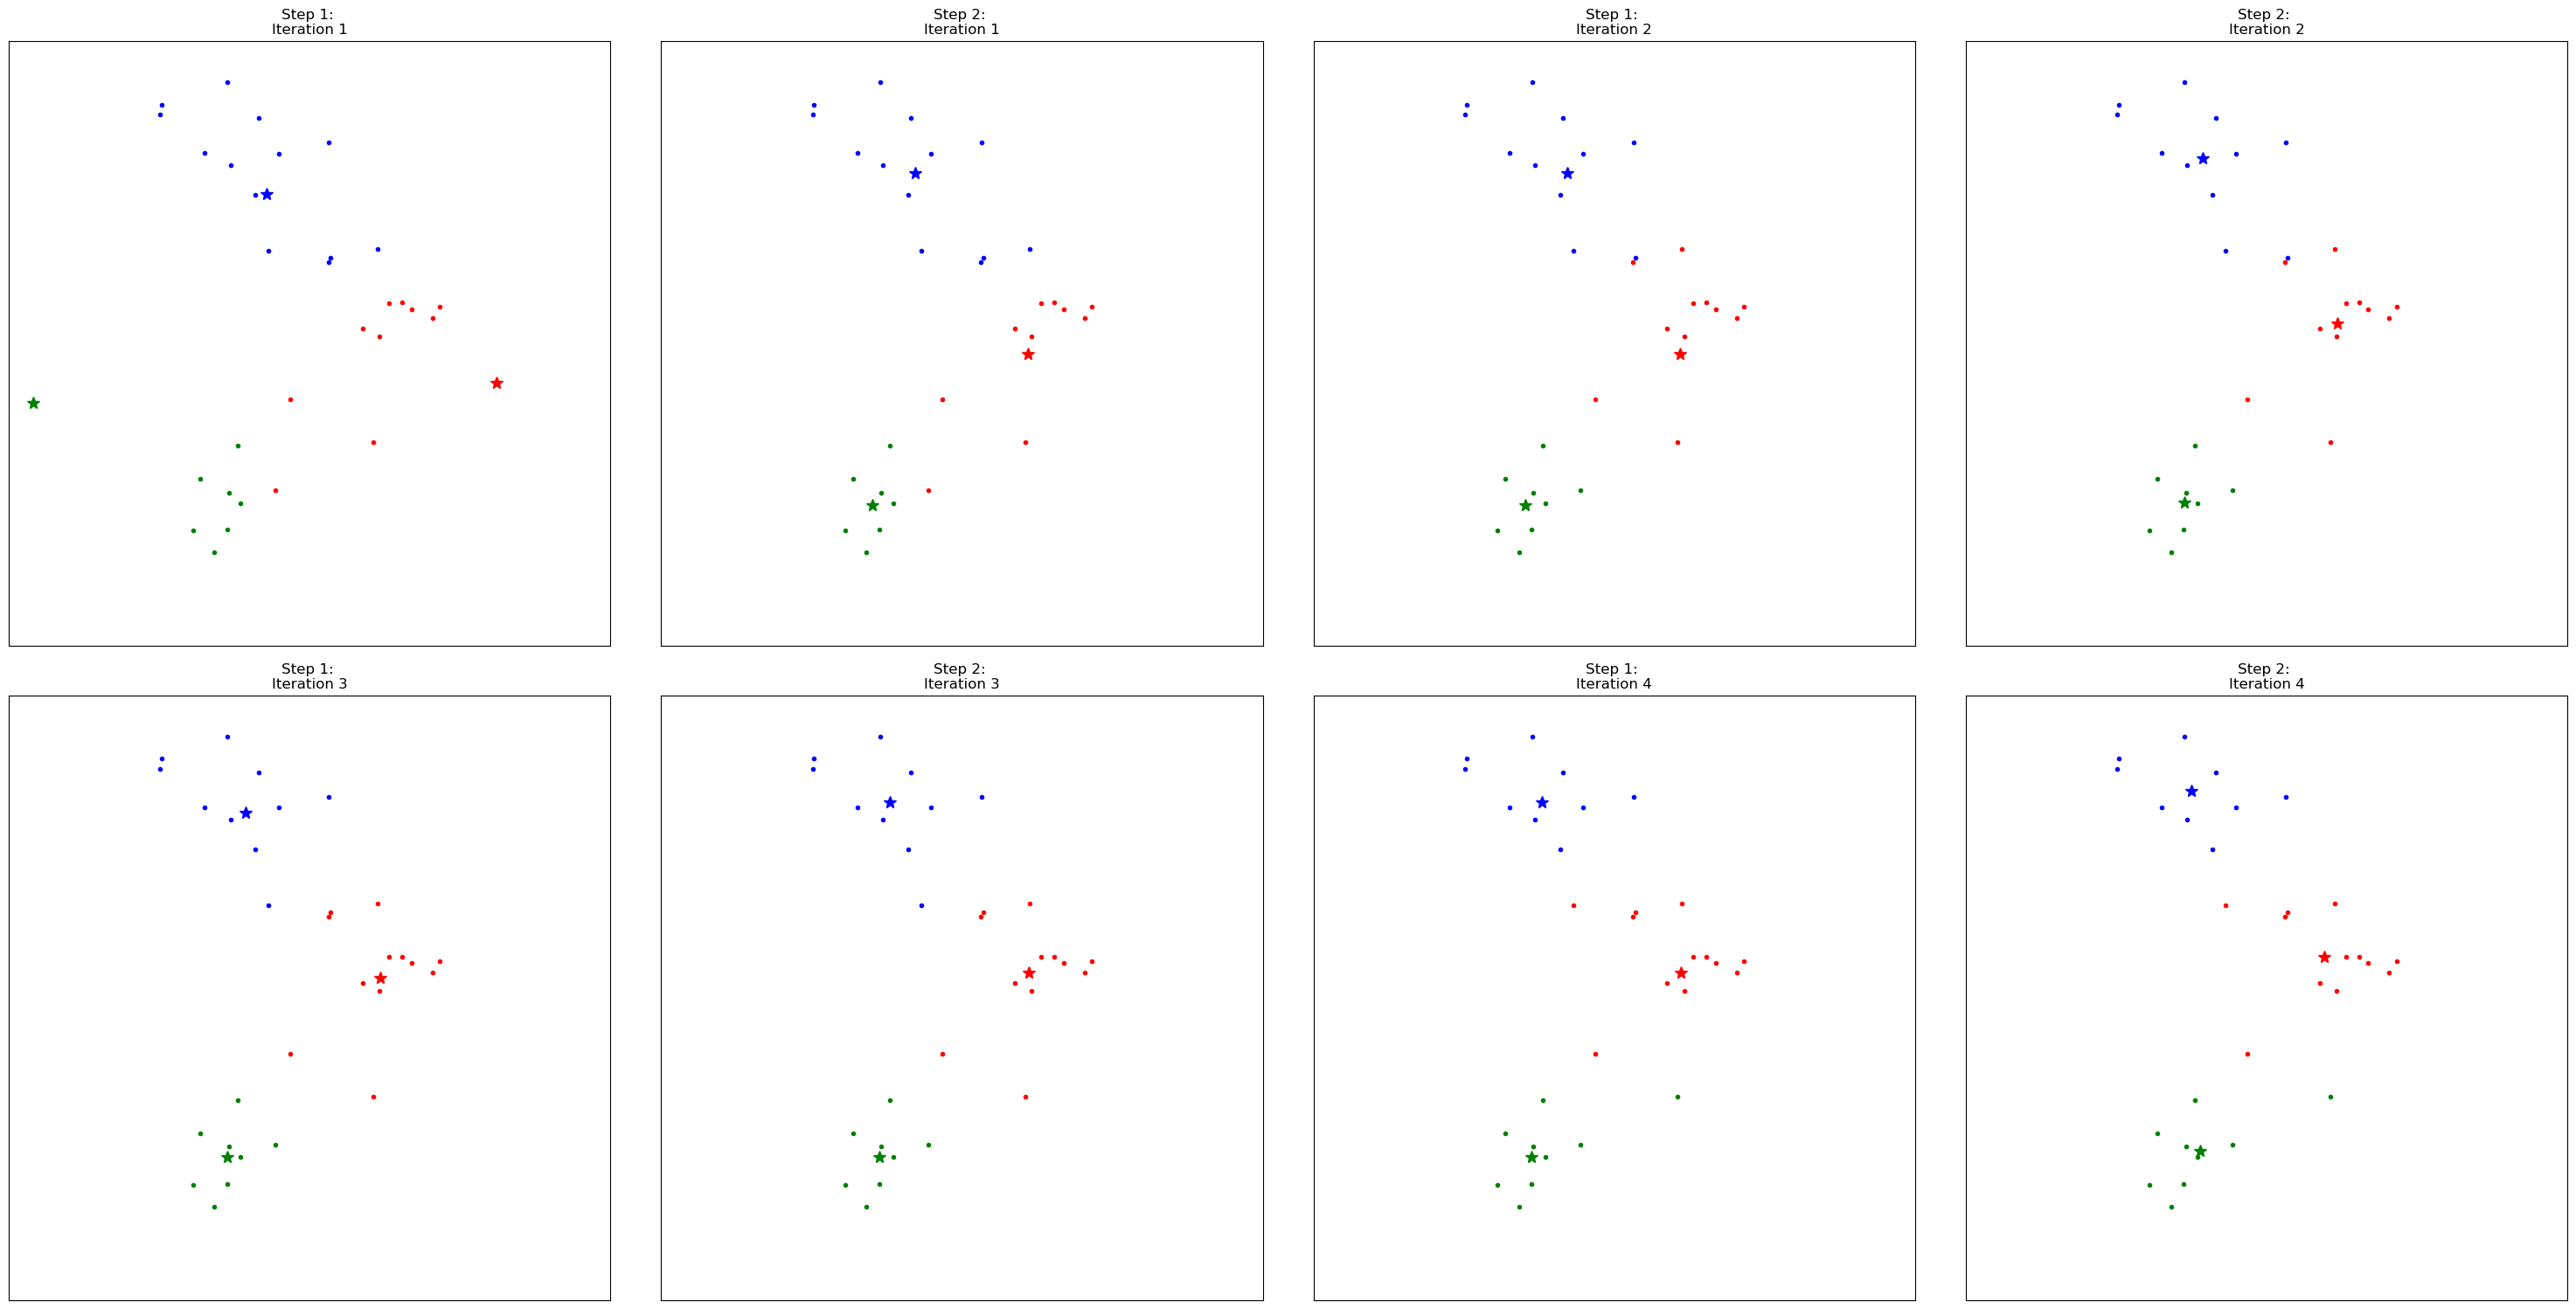

In [81]:
# load the data
data = np.load('data/X.npz')
X = data['X']
centers = data['centers'] 

# run k-means
cluster_assignments, updated_centers, fig = k_means(3, X, centers, update_assignments, update_parameters, n_iter=4)

fig.savefig('PS5_Q9.png')

If the functions you implemented above are working properly, you should see a figure containing a subplot of the output from steps (1) and (2) for four iterations of the algorithm. This plot should give you a sense of how the algorithm progresses over time. The data points are each assigned to one of three colors corresponding to their current cluster label. The cluster centers are plotted as stars.

<div class="alert alert-success"> 

Upload the screenshot of PS5_Q9.png in Gradescope. Describe what happened in the four 2-step iterations in **2-3 sentences**. Do you think we need more iterations in this particular case? Explain why in **one sentence**. </div>

In step 1 of each iteration, we are reassigning the labels of each point corresponding to the 3 cluster center points it is closest to. Then in step 2, we are moving the center point to the center of the new cluster with the points we changed in step 1. Then each iteration repeats upon the reassignments made previously. We likely need very few additional iterations (1 or 2 at most) if any at all, because the center points shift very slightly in the last iteration, and I only observe one or two points that could potentially change labels at the boundary of each cluster.

## Q10.1. New object [5pts, HELP].


Now that we have assigned cluster labels to each datapoint, let's investigate how we should classify a _new_ object (a Shih-Tzu dog):

![](images/maddie.png)


Implement the function `assign_new_object` to determine the appropriate cluster label for this new object.

In [82]:
def assign_new_object(new_object, updated_centers):
    """
    Returns the cluster label (number) for new_object using k-means 
    clustering.
    
    Parameters
    ----------
    new_object : numpy array of shape (2,)
        The (x,y) coordinates of a new object to be classified
        
    updated_centers : numpy array of shape (num_clusters,2)
        An array containing the updated (x,y) coordinates for 
        each cluster center
        
    Returns
    -------
    label : int
       The cluster label assignment for new_object. This is a
       number between 0 and and (num_clusters - 1).
    """
    # YOUR CODE HERE
    curr = 999999999
    label = 0
    for cluster, center in zip(np.arange(len(updated_centers)), updated_centers):
        if curr > distance(new_object, center):
            curr = distance(new_object, center)
            label = cluster
    return label


In [83]:
# (optional) add your own test cases here! Do not submit this to gradescope.


Check `assign_new_object` computes the correct values:

In [84]:
from nose.tools import assert_equal

# validate update_assignments using different values
centers1 = np.array([[ 3.17014624,  2.42738134], [ 2.90932354,  4.26426491]])
assert_equal(assign_new_object(np.array([0, 1]), centers1), 0)
assert_equal(assign_new_object(np.array([1, 0]), centers1), 0)
assert_equal(assign_new_object(np.array([3, 2]), centers1), 0)
assert_equal(assign_new_object(np.array([2, 4]), centers1), 1)

centers2 = np.array([[ 3.170146,  2.427381], [ 3.109456,  1.902395], [ 2.964183,  1.827484]])
assert_equal(assign_new_object(np.array([0, 1]), centers2), 2)
assert_equal(assign_new_object(np.array([1, 0]), centers2), 2)
assert_equal(assign_new_object(np.array([3, 2]), centers2), 1)
assert_equal(assign_new_object(np.array([2, 4]), centers2), 0)

# check that it uses distance
old_distance = distance
del distance
try:
    update_assignments(2, X, np.array([[3, 2], [1, 4]]))
except NameError:
    pass
else:
    raise AssertionError("assign_new_object does not call distance")
finally:
    distance = old_distance
    del old_distance

print("Success!")

Success!


Now that we have the function, let's first rerun $k$-means, to make sure we have the correct variables set:

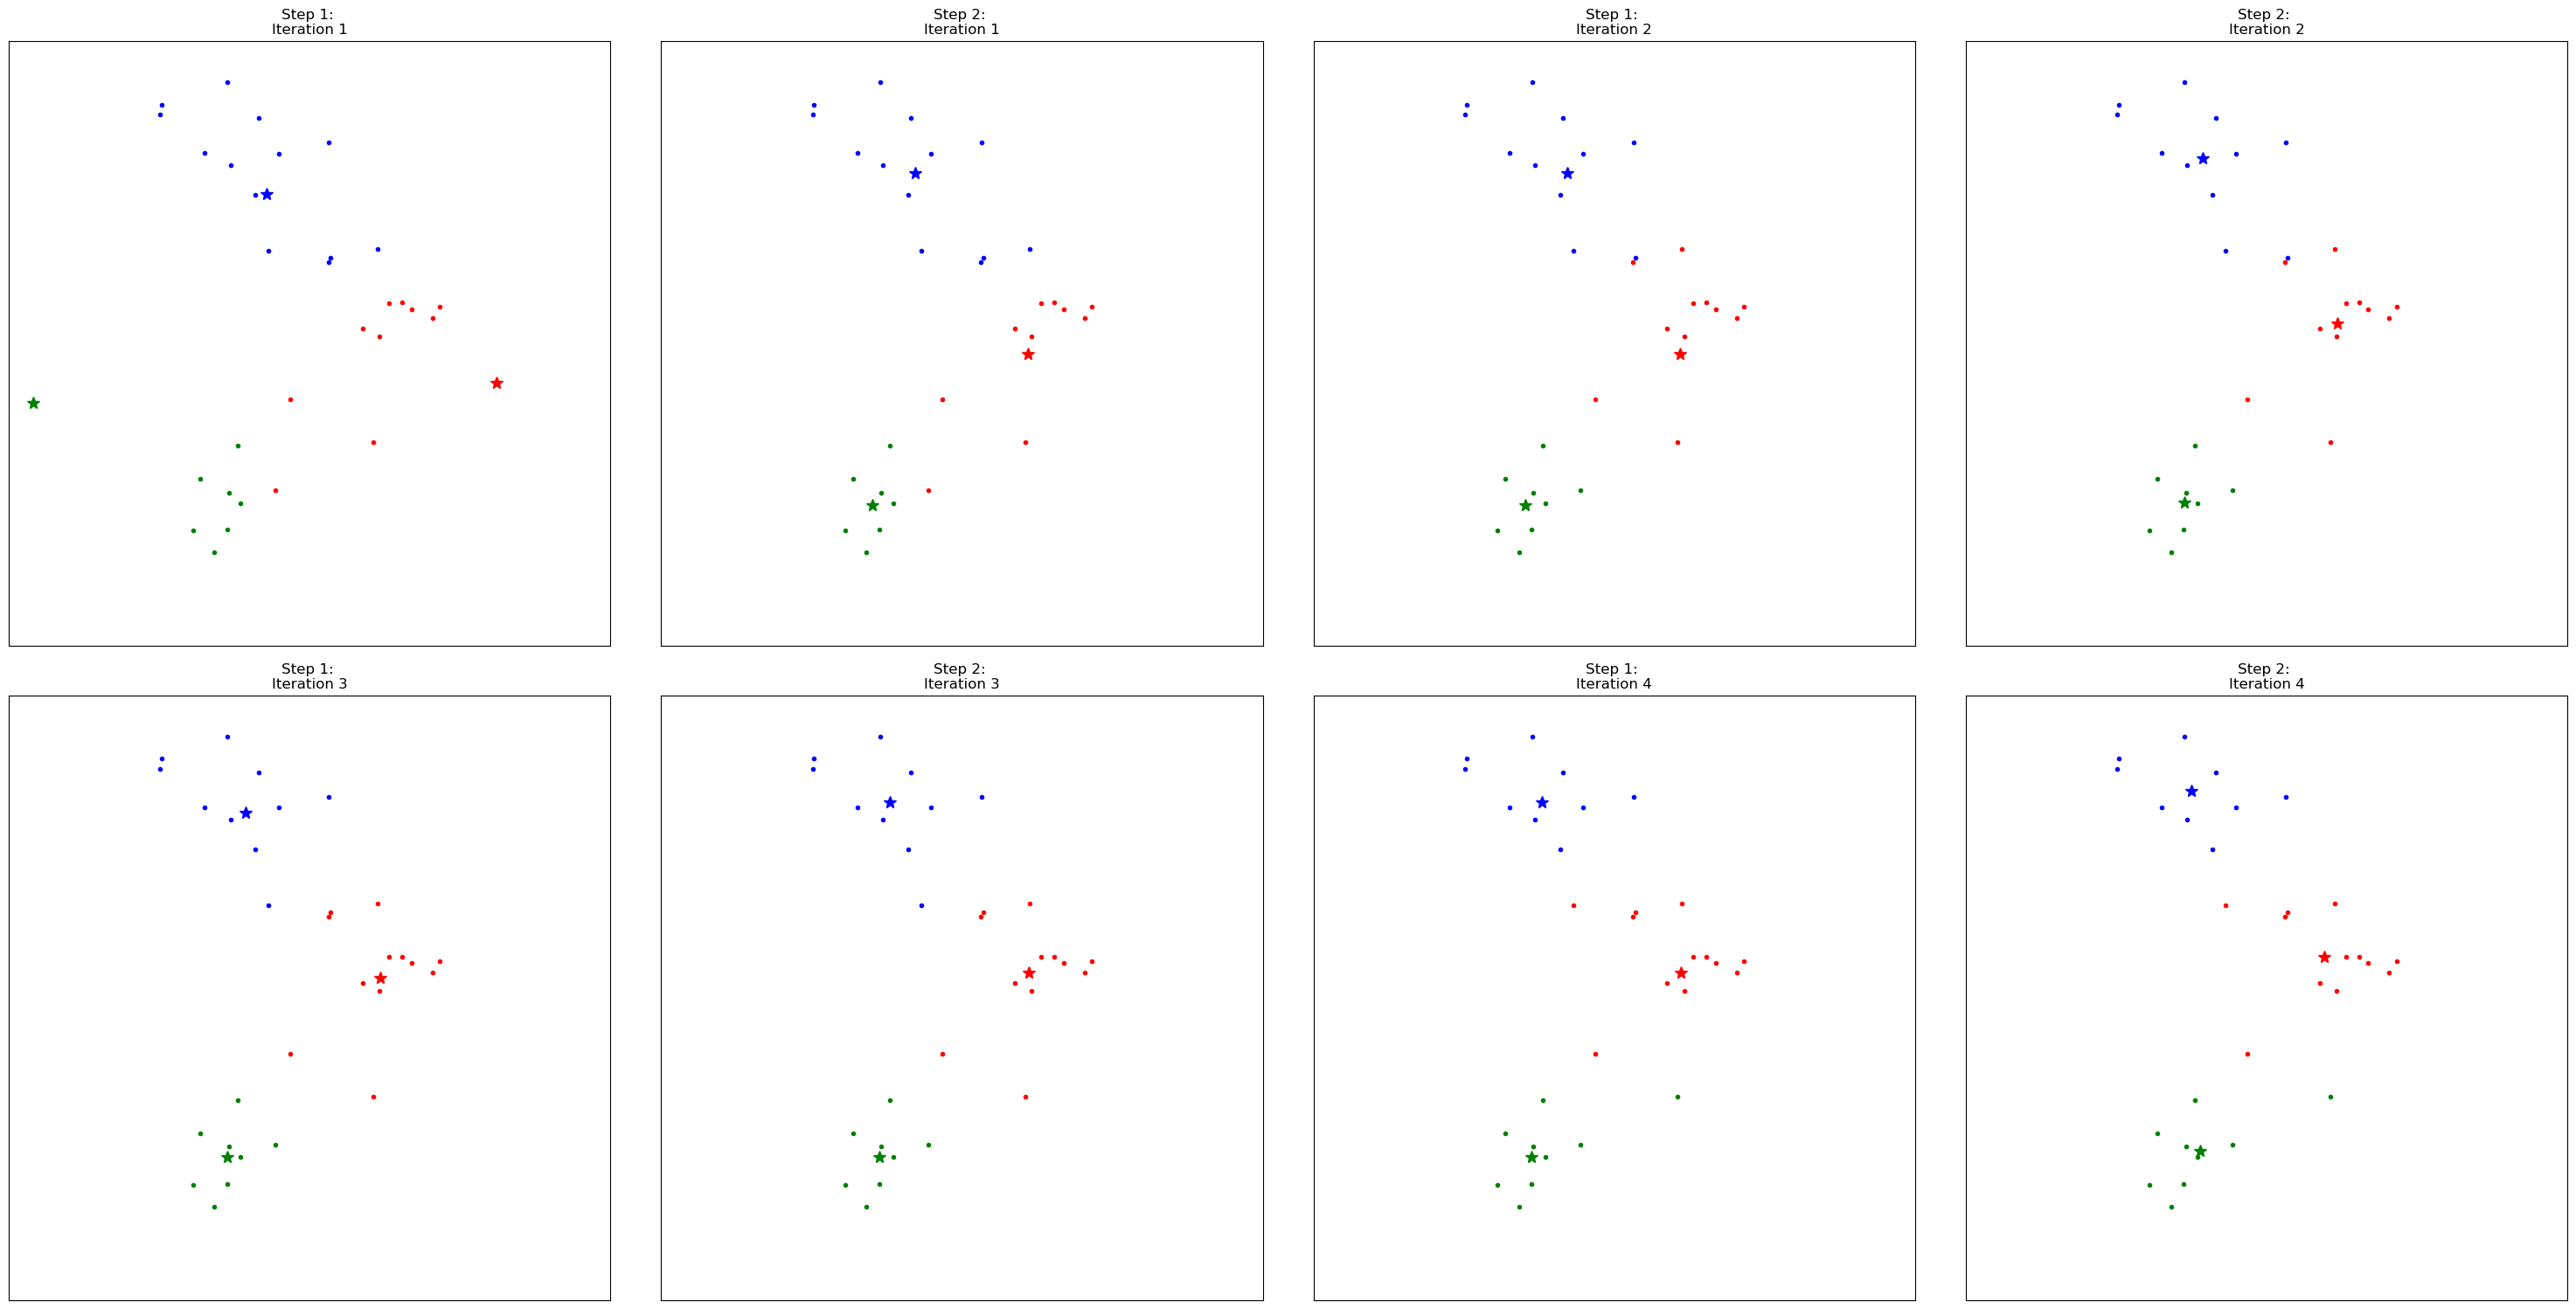

In [85]:
# load the edata
data = np.load('data/X.npz')
X = data['X']
centers = data['centers'] 

# run k-means
cluster_assignments, updated_centers, fig = k_means(3, X, centers, update_assignments, update_parameters, n_iter=4)

Next, let's implement the `assign_new_object` function to classify the image of the Shih-Tzu:

In [86]:
new_object = np.array([3.3, 3.5]) # image coordinates
label = assign_new_object(new_object, updated_centers)
print ('The new object was assigned to cluster: '+ str(label))

The new object was assigned to cluster: 0


Finally, we can check the classification result against the true assignments using the provided helper function `plot_final`:

In [87]:
def plot_final(X, cluster_assignments, updated_centers, new_object,
               assign_new_object):
    """
    Categorizes a new object and plots it against the true cluster
    labels.
    
    Parameters
    ----------    
    X : numpy array of shape (m, 2)
        An array of m data points in R^2
    
    cluster_assignments : numpy array of shape (m,) 
        The final label assignments for each of the data points in X
    
    updated_centers : numpy array of shape (num_clusters, 2)
        The coordinates for the centers of each cluster after 
        running k_means
        
    new_object : numpy array of shape (2,)
        The (x,y) coordinates of a new object to be classified
    
    assign_new_object : function
        The function you completed in part D    
        
    Returns
    -------
    label : fig
       The plotted figure.
    """
    fig, ax = plt.subplots(1,2)
    
    # plot data with colors corresponding to cluster assignments
    
    ax[0].plot(X[(cluster_assignments==0),0], X[(cluster_assignments==0),1], 'r.', label='0')
    ax[0].plot(X[(cluster_assignments==1),0], X[(cluster_assignments==1),1], 'b.', label='1')
    ax[0].plot(X[(cluster_assignments==2),0], X[(cluster_assignments==2),1], 'g.', label='2')
    
    # Generate a label for the new object
    label = assign_new_object(new_object, updated_centers)
    
    # Plot the new object as as big circle on the plot
    if label == 0:
        ax[0].plot(new_object[0], new_object[1], 'ro', markersize=10)
    elif label == 1:
        ax[0].plot(new_object[0], new_object[1], 'bo', markersize=10)
    else:
        ax[0].plot(new_object[0], new_object[1], 'go', markersize=10)
    
    ax[0].set_aspect('equal', 'datalim')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[0].set_title('Final Cluster Assignments')
    ax[0].legend()
    
    # Plot the true cluster assignments for comparison
    ax[1].plot(X[:10, 0], X[:10, 1], 'r.', label='cats')
    ax[1].plot(X[10:20,0], X[10:20, 1], 'b.', label='dogs')
    ax[1].plot(X[20:, 0], X[20:, 1], 'g.', label='mops')
    ax[1].set_title('True Cluster Assignments')
    ax[1].set_aspect('equal', 'datalim')
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[1].legend()
    plt.show()
    
    return fig


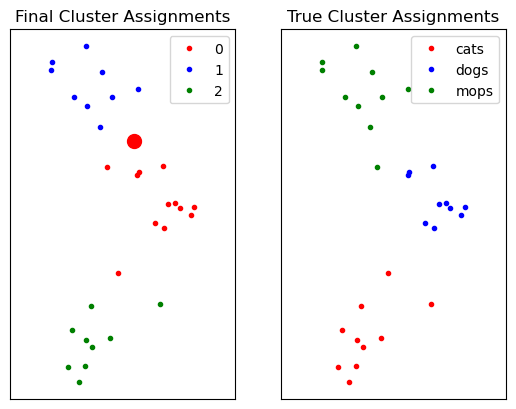

In [88]:
fig = plot_final(X, cluster_assignments, updated_centers, new_object, assign_new_object)

fig.savefig('PS5_Q10.png')


<div class="alert alert-success">
    
Upload figure PS5_Q10.png to gradescope.
    
When interpreting these plots, don't worry if the coloring differs between the two solutions; what matters is whether $k$-means identifies the same cluster boundaries as are shown in the true clusters. In gradescope, explain in **one sentence** why the coloring scheme does not matter.


[hint: what do the cluster labels mean in the algorithm?]


The coloring scheme between the two graphs doesn't matter because the colors correspond to the point belonging to a cluster group, not whether those colors/labels match (i.e. green in the final corresponds to cats in the true, red corresponds with dogs, and blue corresponds with mops).

## Q10.2 New object [2pts, SOLO].

<div class="alert alert-success">
    
A. Did the algorithm correctly identify the Shih-Tzu?  Give an Yes/No answer, and a **one sentence** explanation for how you reached this conclusion.
    
B. Do you notice any differences between the true clusters and those identified via $k$-means? Write **at most two sentences** commenting on any differences you found and why these differences might exist. Hint: are some dots originally in the same cluster incorrectly classified? Why might that be the case?
    
</div>

A. Yes, the algorithm correctly identified the Shih-Tzu, and we can conclude this because the large circle matches the "Dog" label in the true cluster assignments.

B. Yes, there are two points that are incorrectly classified, one true cat that was classified as a dog, and one true mop that was classified as a dog. This might be the case because those two points are closer to the center of the dog k-means cluster than of their true label clusters, or we could possibly need more iterations to correctly classify those incorrect points.

## Q11 Random starting points [5pts, HELP].

<div class="alert alert-success">

We provide a function `init_centers` which returns random starting points for the centers of all clusters. Take a look at the function below. Re-run k-means as you did in Q9, but use `init_centers` to initialize the random starting points for the centers. Use 6 iterations, rather than 4, to run k-means clustering. Try running it for multiple times, until your final clustering results are different than what you got in Q9. Save and upload this figure in gradescope as PS5_Q11.png. Explain how this solution differs from the original one. What happened in the algorithm to produce such results? Your answer should not exceed **two sentences**. </div>


In [89]:
def init_centers(k=3):
    """
    Randomly initialize cluster centers
    """
    return np.vstack([np.random.uniform(low=2., high=4.5, size=k),
                      np.random.uniform(low=1, high=4.5, size=k)]).T

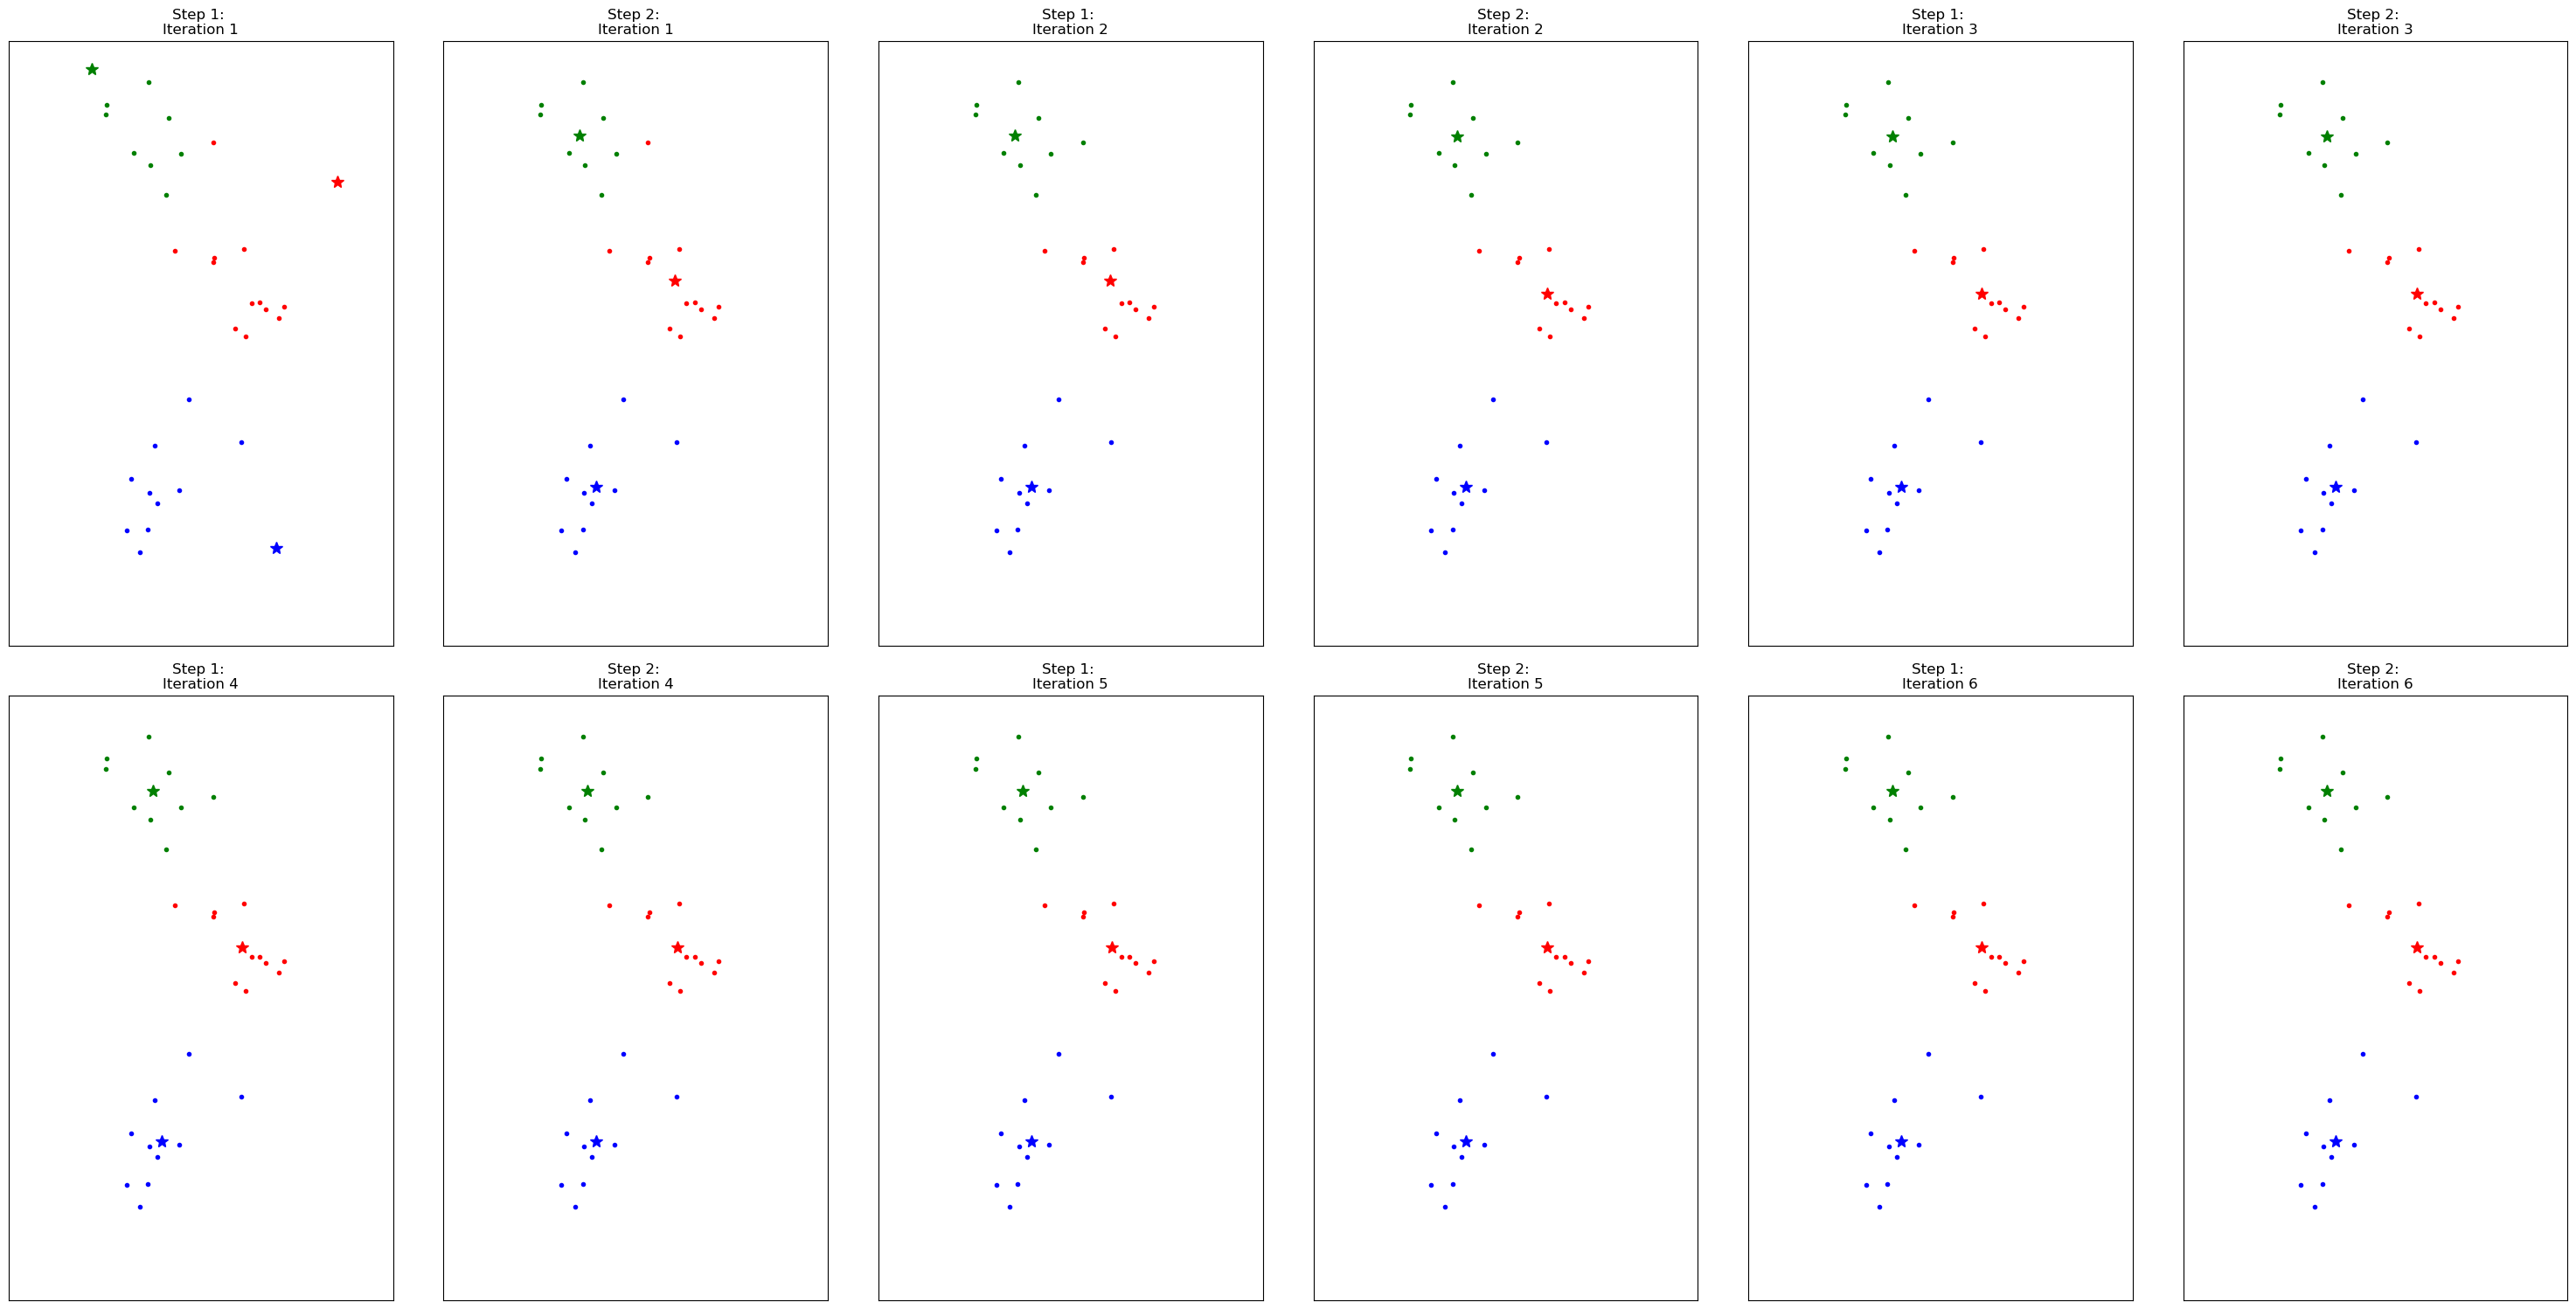

In [90]:
# YOUR CODE HERE
# load the data
data = np.load('data/X.npz')
X = data['X']
centers = init_centers()

# run k-means
cluster_assignments, updated_centers, fig = k_means(3, X, centers, update_assignments, update_parameters, n_iter=6)

fig.savefig('PS5_Q11.png')

This solution differs from the original one by having different starting center points, slightly different ending center points, and a differing classification of one of the data points. Each of these changes occurred because of the randomization of the starting center points, having 6 iterations rather than 4, and having the ending center point converge to a different spot than before.

## Q12 Numbers of clusters

**So far, we have seen examples where we know that there are 3 categories/clusters/labels in the data. However, in general you won't know how many clusters there are in the data ahead of time. In this question, you need to find the correct/optimal number of clusters (k). Let's figure out a way to decide on the value of k.**

### Q12.1 k=2 [2pts, HELP]

<div class="alert alert-success">

Run k-means with k=2 over 4 iterations. Use the cluster center starting points provided by the data (first two of the three starting points) rather than random initializations. Plot the final clusters and upload the figure as PS5_Q12_1.png to Gradescope. Explain the patterns you observe in **at most two sentences** - how does the clustering compare to previous results with k=3?
</div>
    

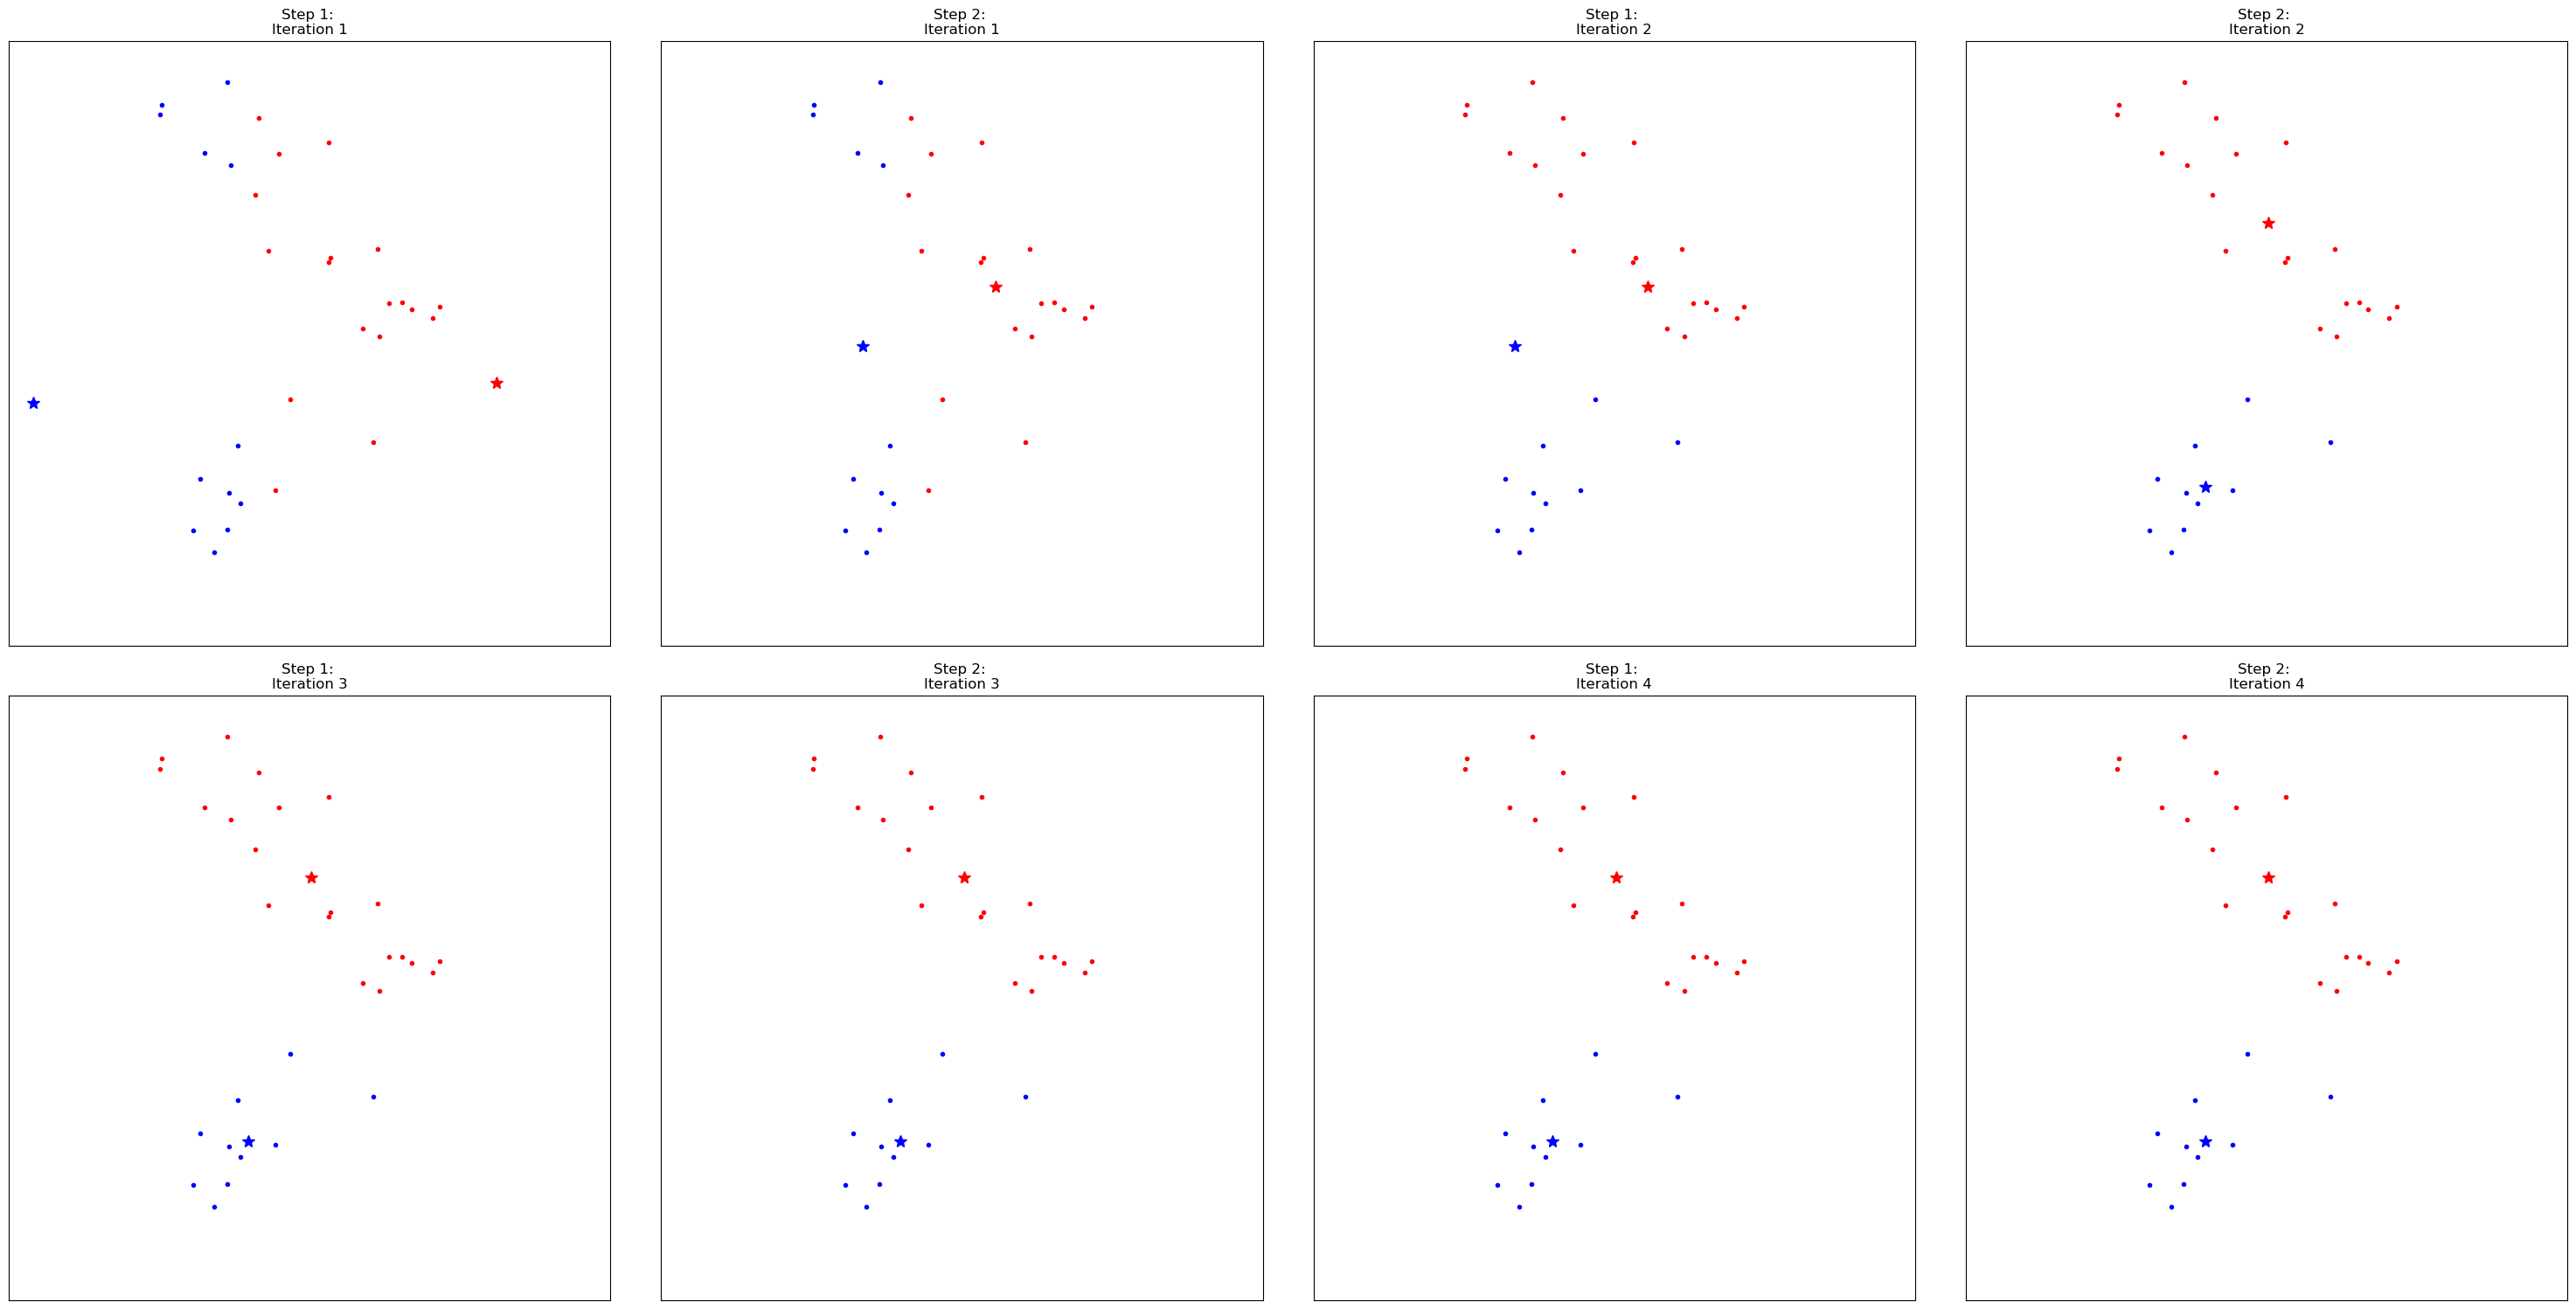

In [91]:
# load the data
data = np.load('data/X.npz')
X = data['X']
centers = data['centers'][(0,2),:] 

# YOUR CODE HERE
cluster_assignments, updated_centers, fig = k_means(2, X, centers, update_assignments, update_parameters, n_iter=4)

fig.savefig('PS5_Q12_1.png')

The patterns I observe is that the labels converge after 2 iterations, and the center points of the 2 clusters converge after 2 iterations as well. This version of clustering with 2 groups/labels converges to a solution much faster than the previous results, and the groups are very broad and large compared to having more than 2 labels.

### Q12.2 Average distance [3pts, SOLO]

<div class="alert alert-success">
Write a function that computes the average distance from the data points to their cluster centers. We'll use this measure to quantify how well the algorithm is doing. Enter in gradescope the average distance for the output of k-means with k=3 over 4 iterations and the starting point centers provided above. Specifically, copy-paste the printed output of the cell (this question will be auto-graded).</div>
    

In [92]:
def average_distance(X,centers,cluster_assignments):
    """
    returns the average distance to clusters
    
    Parameters
    ----------    
    X : numpy array of shape (m, 2)
        An array of m data points in R^2
    
    cluster_assignments : numpy array of shape (m,) 
        The final label assignments for each of the data points in X
    
    centers : numpy array of shape (num_clusters, 2)
        The coordinates for the centers of each cluster after 
        running k_means 
        
    Returns
    -------
    label : 
       The average distance.
    """
    #YOUR CODE HERE
    total_distance = 0
    for i, center in enumerate(centers):
        for point, label in list(zip(X, cluster_assignments)):
            if label == i:
                total_distance += distance(point, center)
    return total_distance / len(X)

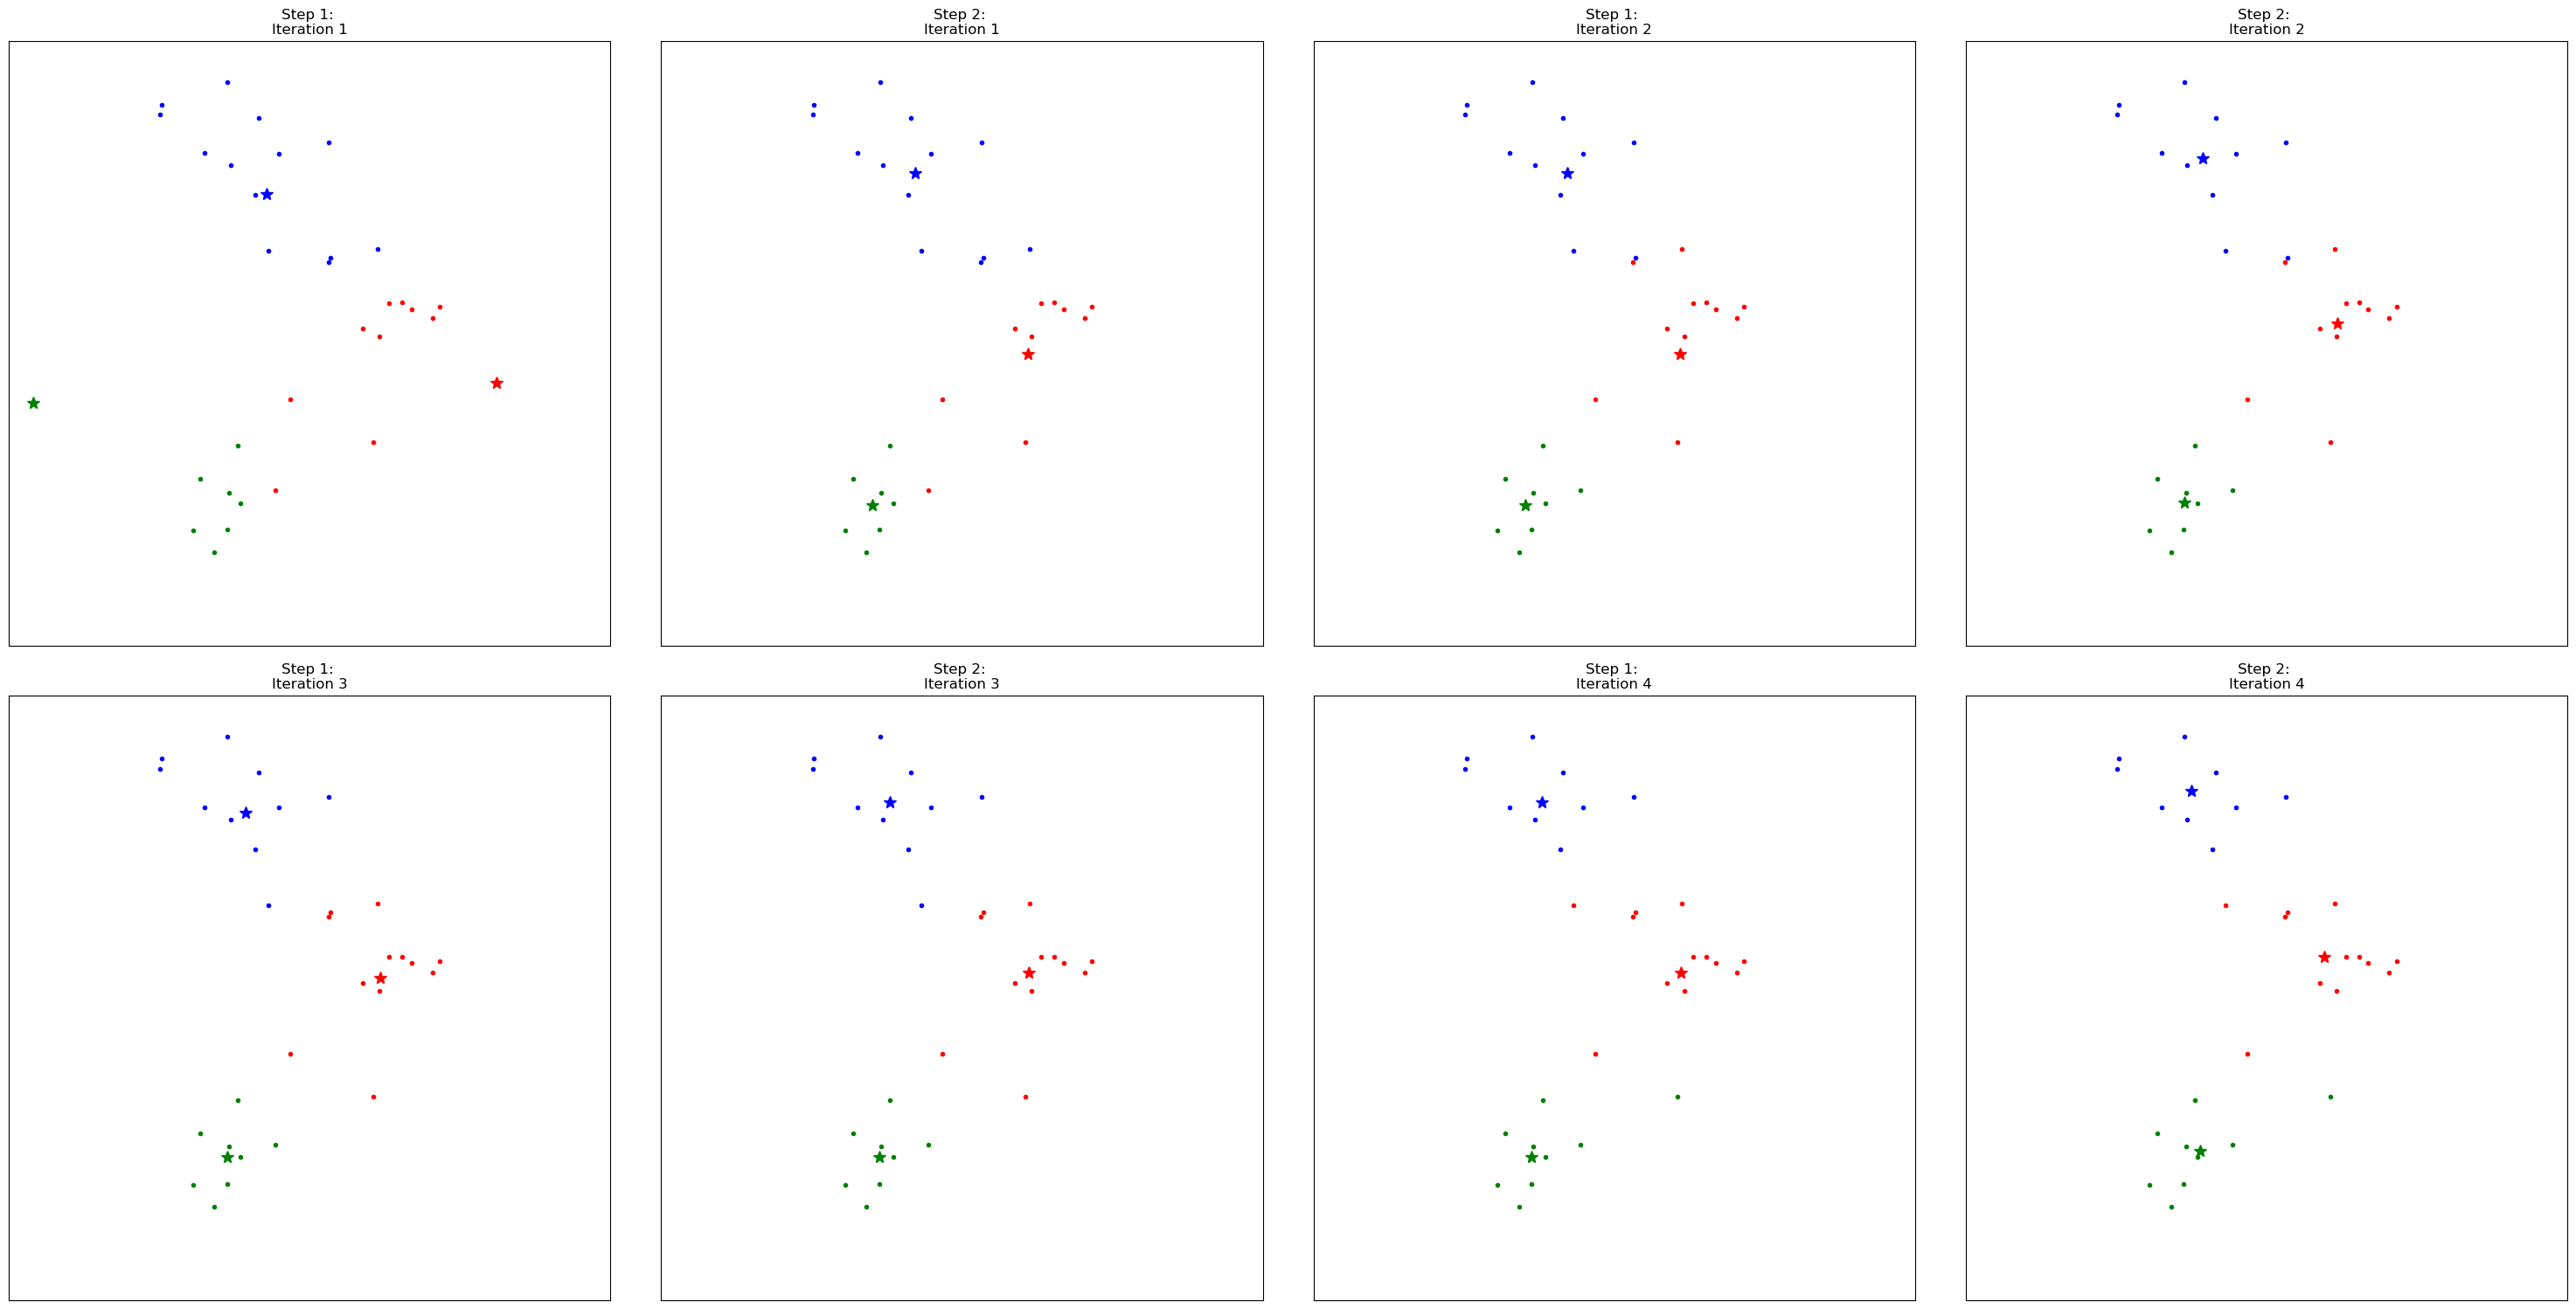

Final distance is: 0.27


In [93]:
# load the data
data = np.load('data/X.npz')
X = data['X']
centers = data['centers'] 

# run k-means
cluster_assignments, updated_centers, fig = k_means(3, X, centers, update_assignments, update_parameters, n_iter=4)

# compute the final distance
print("Final distance is: " + str(np.around(average_distance(X,updated_centers,cluster_assignments),decimals=2)))

### Q12.3 Number of clusters. [5pts, SOLO]

<div class="alert alert-success">

Compute the average distances for k = 2 through 6 after 10 iterations of the algorithm. For each value of k, compute the average distances for 100 different random starting points initialized using the `init_centers` function, and report the minimum average distance over the starting points for this value of k. You should end up with a list or array of 5 minimum average distance values over stating points, one for each value of k. Create a bar plot, showing this minimum average distance as a function of k (x axis = k, y axis = minimum distance). Make sure to set up `plotting=False` as an argument in k-means, so you don't always plot the clustering results for each of the 100*6 times you run it! Upload your plot as PS5_Q12_3.png in gradescope. </div>

To receive full credit, follow these formatting requirements: 
1. Set the title and label the x- and y- axes.
2. Set the limit of the y-axis to [0, 0.5].

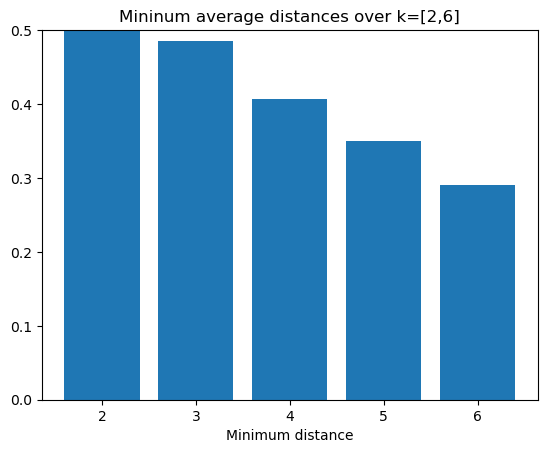

In [102]:
ks = np.arange(2,7)
nsims = 100

#YOUR CODE HERE

final = np.array([])
for k in ks:
    distances = np.array([])
    for i in np.arange(nsims):
        centers = init_centers(k)
        cluster_assignments, updated_centers = k_means(k, X, centers, update_assignments, update_parameters, n_iter=10, plotting = False)
        distances = np.append(distances, average_distance(X,centers,cluster_assignments))
    final = np.append(final, min(distances))

fig, ax = plt.subplots()

ax.bar(ks, final)
ax.set_xlabel('k')
ax.set_xlabel('Minimum distance')
ax.set_title('Mininum average distances over k=[2,6]')
ax.set_ylim([0,0.5])

fig.savefig('PS5_Q12_3.png')


### Q12.4 Evaluating k-means. [3pts, HELP]

If you got Q12.3 right, you should see that our average distance measure identifies $k=6$ as better than $k=3$. However, we know that's not the case: there are three clusters in our data. Therefore, our way of trying to determine the optimal number of clusters is flawed. In **2-3 sentences**, explain why the measure we chose is not a good measure to determine which value of $k$ we should select. Hint: consider what would happen if we selected $k=$ the number of points in our data set. 

The minimum distance is not a good measure to determine which value of 𝑘 we should select because this measure will naturally decrease for larger values of 𝑘. This is because having higher values of 𝑘 means we will have more center points to compare against, which means that the minimum distance of any given point will be smaller.  This does not give us any insight into how many groups/clusters there actually are in our data.

<div style="background-color: #c1f2a5">

# Submission

    
When you're done with your problem set, do the following:
- Upload your answers in Gradescope's PS5.
- Convert your Jupyter Notebook into a `.py` file by doing so:    
    
</div>


<center>    
  <img src="../img/py_exporting_instructions.png" width="500"/>
</center>

<div style="background-color: #c1f2a5">
    
- Submit the `.py` file you just created in Gradescope's PS5-code.
    
</div>        




</div>


---